# Clustering Analysis of Taxi Trip Data: Identifying Key Regions and Predictive Factors for Revenue: 
<p style="color:DimGray; text-align:left; font-size:20px"><i> the case of the New York City </i></p>

<p style="color:DimGray; text-align:left;"><i>This study applies clustering analysis to NYC taxi trip data to identify key regions and explore factors influencing revenue. The research reveals significant geographical distinctions and operational insights, offering strategic recommendations for enhancing profitability in urban taxi services.</i></p>

<p style="color:DimGray; text-align:right;"><i>Word Count (excluding the Python scripts and comments): 2017</i></p>

***

<br><br>

<a id="ID_intr"></a>
| [1. Introduction](#ID_intr) | [2. Literature Review](#ID_lt) | [3. Research Question](#ID_rq) | [4. Presentation of Data](#ID_pre) | [5. Methodology](#ID_meth) | [6. Results and Discussion](#ID_resu) | [7. Conclusion](#ID_con) |

## 1. Introduction

Major cities like New York City provide a rich dataset for analysis and insights because of the dynamic and complicated nature of their urban mobility, particularly in the taxi industry. As a vital component of the urban transportation system, taxis produce large amounts of data that can be analysed to enhance economic results, optimise operational efficiency, and improve service delivery. 

This paper aims to apply clustering analysis to NYC taxi trip data to identify patterns and categorise trips into meaningful clusters. By focusing on representative regions based on this clustering, we seek to identify and model the key factors influencing revenue generation in taxi trips. This study not only contributes to the theoretical understanding of urban transportation but also provides practical insights for stakeholders involved in this sector.

### 1.1 Requirements to run the analysis


In [1]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

from math import ceil

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error, r2_score

# preprocessors
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# CART
from sklearn.tree import DecisionTreeRegressor

import rfpimp

#Clustering analysis
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt

import libpysal
import warnings

In [2]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

In [3]:
from sklearn.cluster import KMeans

<br><br>

<a id="ID_lt"></a>
| [1. Introduction](#ID_intr) | [2. Literature Review](#ID_lt) | [3. Research Question](#ID_rq) | [4. Presentation of Data](#ID_pre) | [5. Methodology](#ID_meth) | [6. Results and Discussion](#ID_resu) | [7. Conclusion](#ID_con) |

## 2. Literature Review

This study uses cab trip data to analyse urban travel patterns and applies DBSCAN and K-means clustering to analyse the complex transit system in New York City. (Liu et al., 2015). Following in the footsteps of Kumar et al. (2016), who uncovered critical urban travel behaviours from over 10 million taxi trips, this research contrasts DBSCAN's density-focused clustering with K-means' centroid-based grouping to pinpoint key traffic hubs within the city's complex structure.

Aligned with the work of Liu et al. (2012), which validated taxi trajectory models via Monte Carlo simulations, this analysis advances methodological innovation by comparing and contrasting two different clustering strategies. This dual analysis promises a richer understanding of the city's transportation flow, essential for strategic urban planning.

Supplementing spatial analysis, this research investigates taxi revenue influencers, building on Nguyen-Phuoc et al. (2020) and Hou et al. (2020), who highlighted customer satisfaction and pooled rides as pivotal to profitability. By employing the CART model for a nuanced assessment of variables like tip amounts and passenger counts, as Pahmi et al. (2018) did, along with advanced regression techniques, the study aims to distil a robust model predicting revenue based on various factors. The insights derived will inform strategic improvements for New York City's taxi services, steering towards enhanced efficiency and revenue optimisation.
rations.


<br><br>

<a id="ID_rq"></a>
| [1. Introduction](#ID_intr) | [2. Literature Review](#ID_lt) | [3. Research Question](#ID_rq) | [4. Presentation of Data](#ID_pre) | [5. Methodology](#ID_meth) | [6. Results and Discussion](#ID_resu) | [7. Conclusion](#ID_con) |

## 3. Research Question

Based on the previous section, our main research question is:

    How does clustering analysis of taxi trip data from New York City facilitate the identification of key geographical regions, and what are the primary factors influencing revenue generation within these areas?

We can divide this into 3 sub-questions:

    1: What regions are identified as most typical or representative within the New York City taxi industry through clustering analysis?

    2: How are variables such as trip distance, time of day, tip amount, and passenger count associated with the revenue generated from taxi trips in these key regions?

    3: Can the insights derived from the analysis of clustered regions be utilised to devise targeted strategies that enhance operational efficiency and profitability for taxi services in urban environments?

<br><br>

<a id="ID_pre"></a>
| [1. Introduction](#ID_intr) | [2. Literature Review](#ID_lt) | [3. Research Question](#ID_rq) | [4. Presentation of Data](#ID_pre) | [5. Methodology](#ID_meth) | [6. Results and Discussion](#ID_resu) | [7. Conclusion](#ID_con) |

## 4. Presentation of Data 

### 4.1 Geographic Data

First, we import the geographic data of the taxi zones in NYC for further analysis, the shapefile data can be find [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

In [4]:
url = 'https://github.com/ucfnxuo/CASA0006-final/raw/main/data/taxi_zones.zip'

! wget $url

--2024-04-20 23:30:40--  https://github.com/ucfnxuo/CASA0006-final/raw/main/data/taxi_zones.zip
Resolving github.com (github.com)... 20.26.156.215
Connecting to github.com (github.com)|20.26.156.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ucfnxuo/CASA0006-final/main/data/taxi_zones.zip [following]
--2024-04-20 23:30:40--  https://raw.githubusercontent.com/ucfnxuo/CASA0006-final/main/data/taxi_zones.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1025147 (1001K) [application/zip]
Saving to: ‘taxi_zones.zip’

taxi_zones.zip      100%[===================>]   1001K  --.-KB/s    in 0.05s   

2024-04-20 23:30:40 (19.1 MB/s) - ‘taxi_zones.zip’ saved [1025147/1025147]



Below is some basic information about this map

In [5]:
gdf = gpd.read_file(f"zip://taxi_zones.zip!taxi_zones.shp")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int64   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int64   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 14.5+ KB


We draw this map for intuitive visualisation.

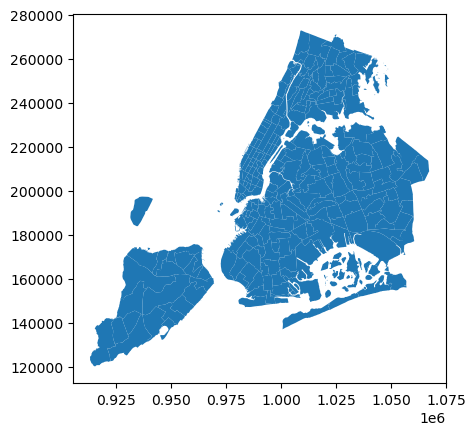

In [6]:
gdf.plot()
plt.show()

### 4.2 Census Data

Next we import the census data of the NYC, the dataset can be find [here](https://www.nyc.gov/site/planning/planning-level/nyc-population/2020-census.page).

Since the data in the 'pop' column is not purely integers, we convert it to integer form

In [7]:
pop = pd.read_csv('https://raw.githubusercontent.com/ucfnxuo/CASA0006-final/main/data/nyc2020census.csv')
pop['Pop1'] = pop['Pop1'].str.replace(',', '').astype(int)
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782 entries, 0 to 2781
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     2711 non-null   float64
 1   GeoType  2711 non-null   object 
 2   Borough  2660 non-null   object 
 3   GeoID    2711 non-null   object 
 4   BCT2020  2327 non-null   float64
 5   Name     455 non-null    object 
 6   CDType   71 non-null     object 
 7   NTAType  256 non-null    float64
 8   Pop1     2782 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 195.7+ KB


We primarily use the data from the 'pop' column, representing population, along with taxi trip data for clustering analysis.

We can combine the two datasets above by the column "zone" and the column "Name"

### 4.3 Taxi Trip Data

The taxi trip data we use are in different months in 2023. The dataset can be found [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

We will use the yellow taxi data in this research since it is the most typical kind of taxi in NYC. Below are the detailed information about this dataset.

| Field Name                      | Description                                                                                                                       | 
|---------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| VendorID                        | A code indicating the TPEP provider that provided the record.<br/>1= Creative Mobile Technologies, LLC; <br/>2= VeriFone Inc|       
| tpep_pickup_datetime            | The date and time when the meter was engaged.  | 
| tpep_dropoff_datetime           | The date and time when the meter was disengaged.   | 
| Passenger_count                 | The number of passengers in the vehicle. <br/> This is a driver-entered value. | 
| Trip_distance                   | The elapsed trip distance in miles reported by the taximeter  |
| PULocationID                    | TLC Taxi Zone in which the taximeter was engaged  |
| DOLocationID                    | TLC Taxi Zone in which the taximeter was disengaged  | 
| RateCodeID                      | The final rate code in effect at the end of the trip. <br/> 1= Standard rate  <br/> 2=JFK  <br/> 3=Newark |
| Store_and_fwd_flag              | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor <br/> Y= store and forward trip| 
| Payment_type                    | A numeric code signifying how the passenger paid for the trip. <br/> 1= Credit card   <br/> 2= Cash | 
| Fare_amount                     | The time-and-distance fare calculated by the meter|
| Extra                           | Miscellaneous extras and surcharges. | 
| MTA_tax                         | 0.50 MTA tax that is automatically triggered based on the metered rate in use.                                          |
| Improvement_surcharge           | 0.30 improvement surcharge assessed trips at the flag drop. | 
| Tip_amount                      | This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount                    | Total amount of all tolls paid in trip. |
| Total_amount                    | The total amount charged to passengers. Does not include cash tips. |
| Congestion_Surcharge            | Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee                     | $1.25 for pick up only at LaGuardia and John F. Kennedy Airports |

#### Merge and Normalise Data

We will load and clean data from all 12 months, then normalised them for better visualisation. 

Here we focus on four variables: 

* ```average total amount```: the average total amount for each zone
* ```average trip distance```: the average trip distance for each zone
* ```frequency```: the number of taxi trips started from each zone
* ```pop```: the population size for each zone


In [8]:
yellow_data = {}
ppd_dict = {}
raw_data_dict = {}
normalized_data_dict = {}

In [9]:
def load_and_clean_data(file_url):
    # Load the data
    data = pd.read_parquet(file_url)
    # Filter the data
    data = data[data['trip_distance'] > 0]
    data = data[data['total_amount'] > 0]
    data = data.dropna()
    # Reset the index and drop the old one
    data.reset_index(drop=True, inplace=True)
    return data

def ppd_data(df, gdf, pop):
    # Group by PULocationID and calculate the required statistics
    df_grouped = df.groupby('PULocationID').agg(
        frequency=('PULocationID', 'size'),
        avg_total_amount=('total_amount', 'mean'),
        avg_trip_distance=('trip_distance', 'mean')
    ).reset_index()
    
    # Merge with the geographic and population data
    df_merged = pd.merge(gdf, df_grouped, left_on='LocationID', right_on='PULocationID', how='inner')
    df_merged = pd.merge(df_merged, pop, left_on='zone', right_on='Name', how='inner')

    return df_merged

def raw_data(df_merged):   
    # Select and re-index the relevant columns
    raw = df_merged[['LocationID', 'avg_total_amount', 'avg_trip_distance', 'frequency', 'Pop1']].set_index('LocationID').copy()
    
    return raw

def normalize_data(df):
    normed = df.copy()
    for c in df.columns.values:
        normed[c] = rs.fit_transform(df[c].values.reshape(-1,1))
    return normed

In [10]:
# Loop over each dataset
for month in range(1, 13):
    file_url = f'https://github.com/ucfnxuo/CASA0006-final/raw/main/data/yellow_tripdata_2023-{month:02d}.parquet'
    
    # Load and clean the data
    yellow_month = load_and_clean_data(file_url)
    yellow_data[f'yellow_{month}'] = yellow_month

    ppd_month = ppd_data(yellow_month, gdf, pop)
    ppd_dict[f'ppd_{month}'] = ppd_month
    
    # Aggregate the data
    raw_month = raw_data(ppd_month)
    raw_data_dict[f'raw_{month}'] = raw_month
    
    # Normalize the data
    normed_month = normalize_data(raw_month)        
    normalized_data_dict[f'normed_{month}'] = normed_month
    
    # Optionally print the first few rows 
    print(f'Data for month {month}:')
    print(normed_month.head())

Data for month 1:
            avg_total_amount  avg_trip_distance  frequency      Pop1
LocationID                                                          
1                   1.733017           0.255488  -0.000789 -0.475448
2                  -0.061297           0.121857  -0.002534 -0.475687
3                   0.068488           0.080163  -0.001987  0.010694
4                  -0.175253          -0.294313   0.060870  0.414590
5                   1.383415           1.530845  -0.001441 -0.044708
Data for month 2:
            avg_total_amount  avg_trip_distance  frequency      Pop1
LocationID                                                          
1                   1.420396           0.000000  -0.000904 -0.472605
2                   1.614386           1.443588  -0.002382 -0.472844
3                   0.090843           0.220793  -0.001676  0.014048
4                  -0.224951          -0.264989   0.063310  0.418370
5                   1.610057           1.362406  -0.001477 -0.04141

In [11]:
for month in range(1, 13):
    # Dynamically create variable names and assign corresponding DataFrame from the dictionary
    globals()[f'yellow_{month}'] = yellow_data[f'yellow_{month}']
    globals()[f'ppd_{month}'] = ppd_dict[f'ppd_{month}']
    globals()[f'raw_{month}'] = raw_data_dict[f'raw_{month}']
    globals()[f'normed_{month}'] = normalized_data_dict[f'normed_{month}']

<br><br>

#### Total Amount Raw Distribution

Since our target feature is the taxi revenue, we choose total amount to represent this. Below are the 12 plots for each month of the total amount distribution in NYC

In [12]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

In [13]:
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

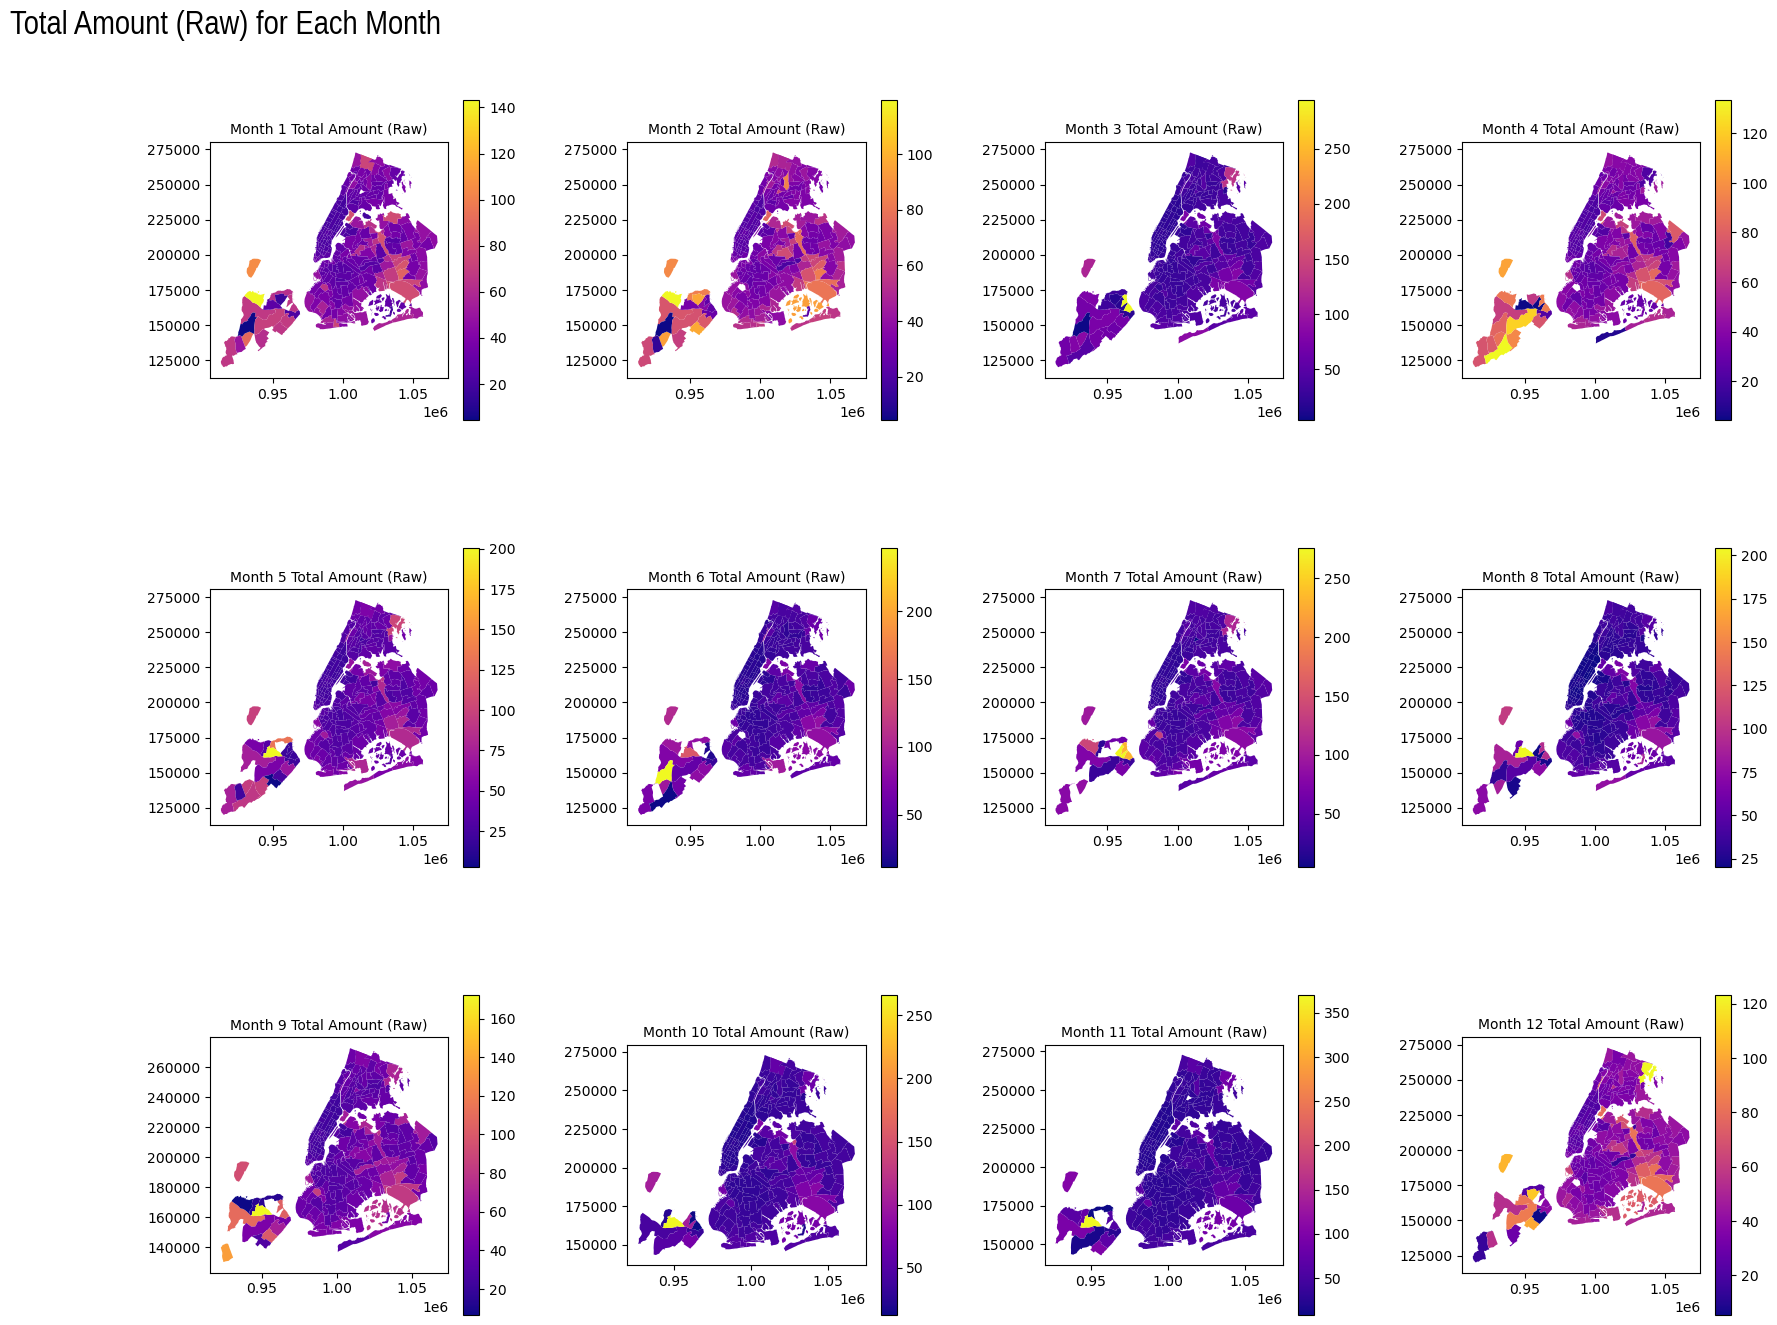

In [14]:
f, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month-1]
    ppd_month = globals()[f'ppd_{month}']
    ppd_month.plot(column='avg_total_amount', legend=True, cmap='plasma', ax=ax)
    ax.set_title(f"Month {month} Total Amount (Raw)", size=10)

f.subplots_adjust(top=0.92, hspace=0.4, wspace=0.4)
f.suptitle("Total Amount (Raw) for Each Month", x=0.025, size=24, **tfont)

plt.show()

#### Histogram of average total amount

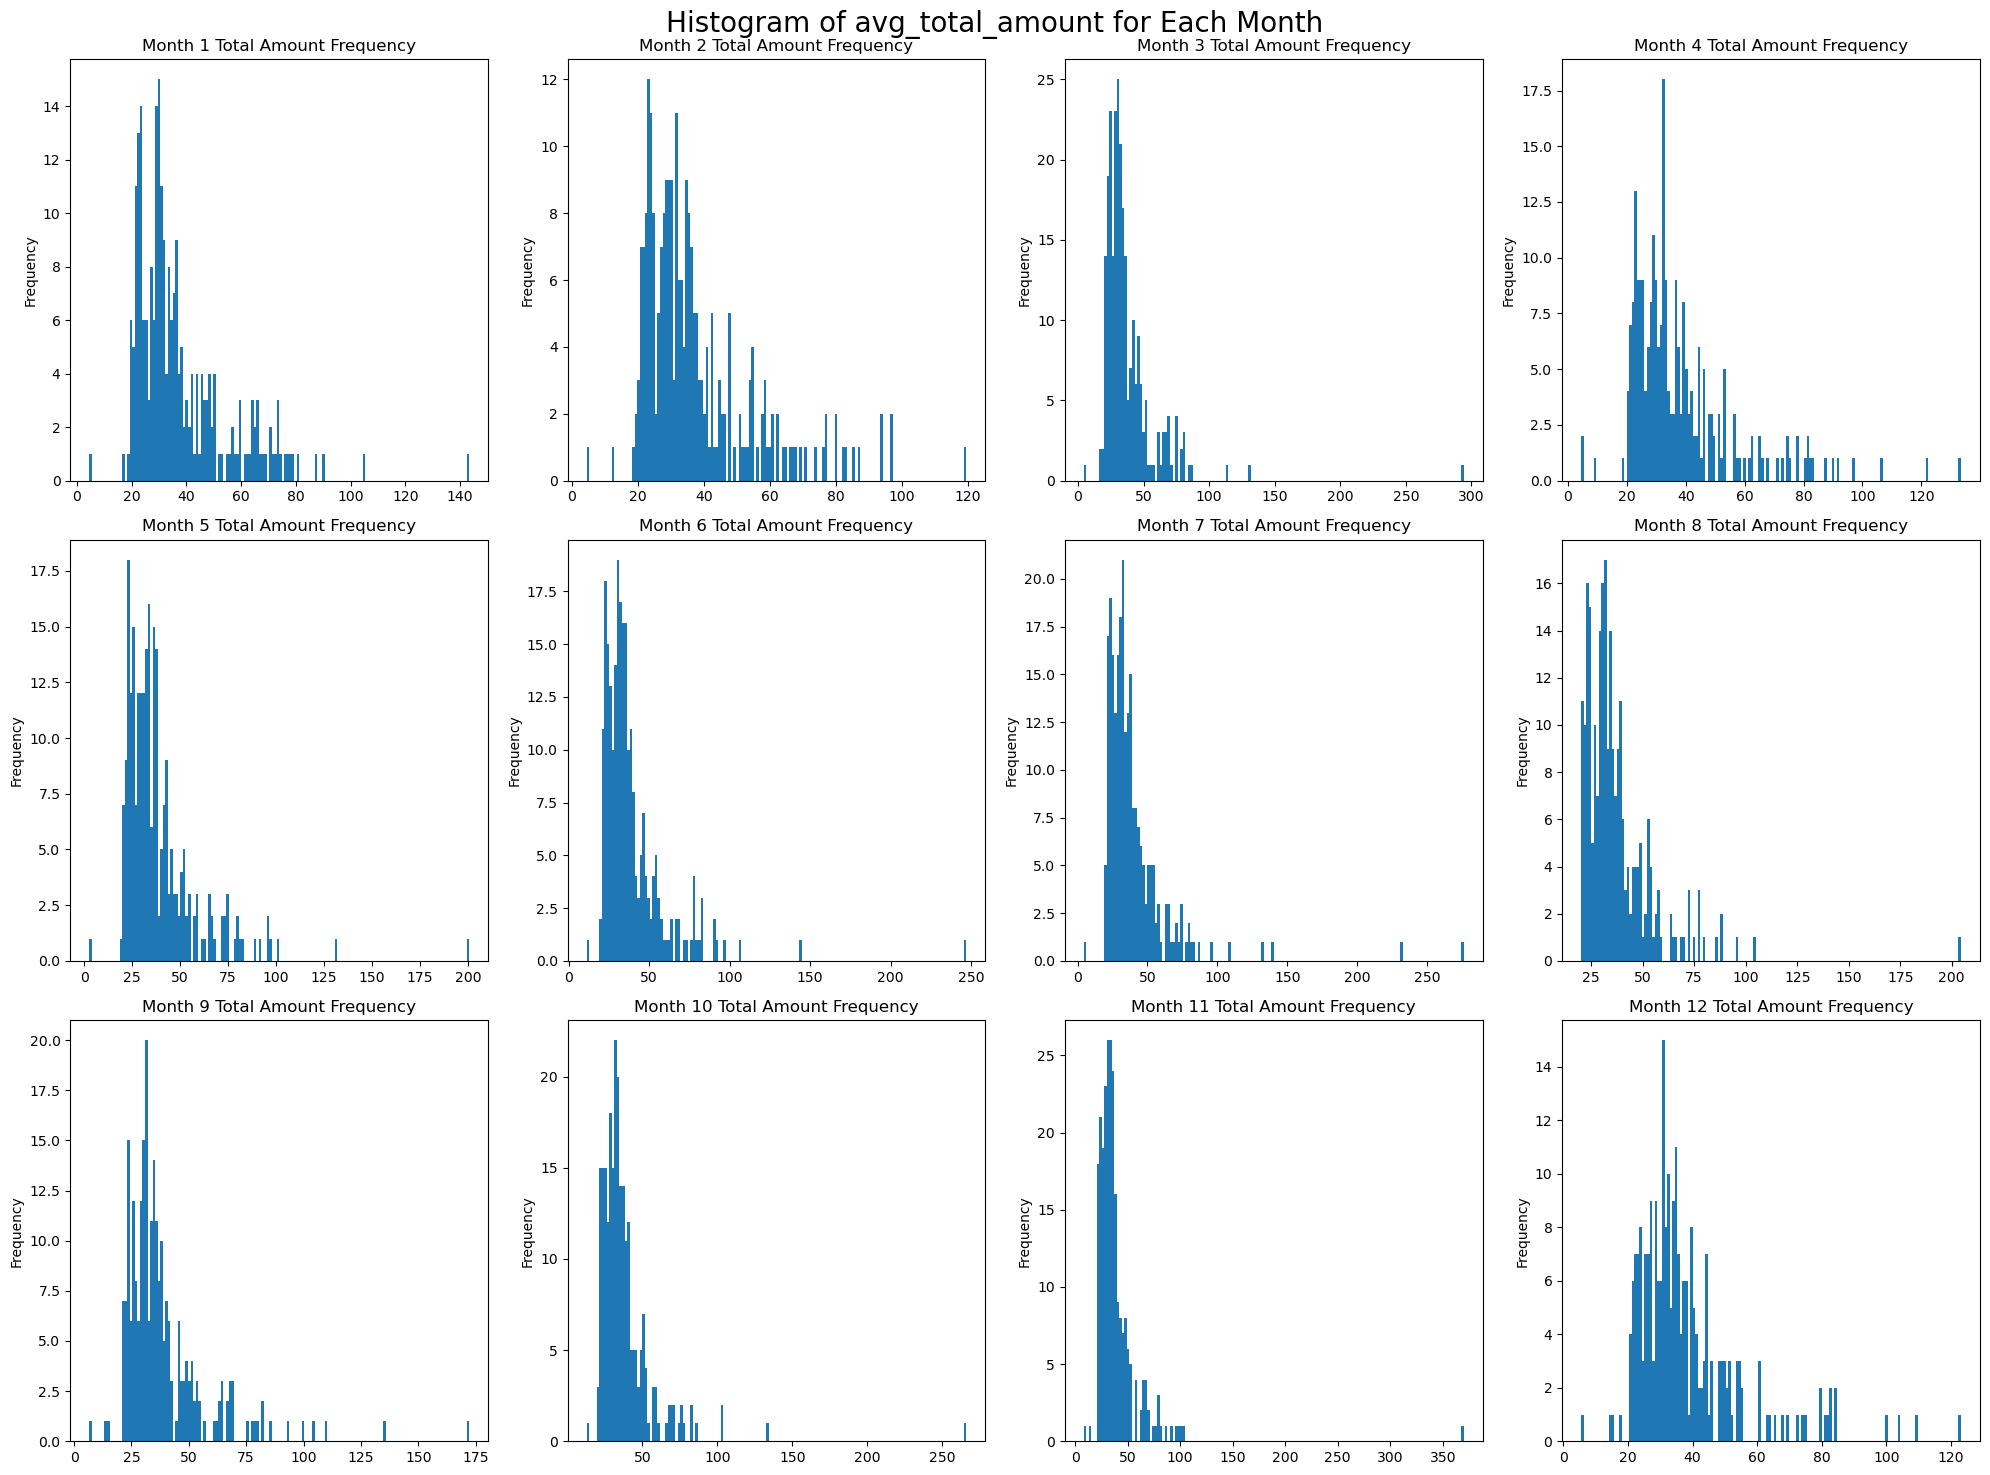

In [15]:
f, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
for month in range(1, 13):
    raw_month = globals()[f'raw_{month}']
    ax = axes[month-1]
    raw_month.avg_total_amount.plot.hist(bins=150, ax=ax)
    ax.set_title(f'Month {month} Total Amount Frequency')

f.suptitle('Histogram of avg_total_amount for Each Month', size=20)
plt.tight_layout()
plt.show()

#### Scatter Plot between average total amount and population size

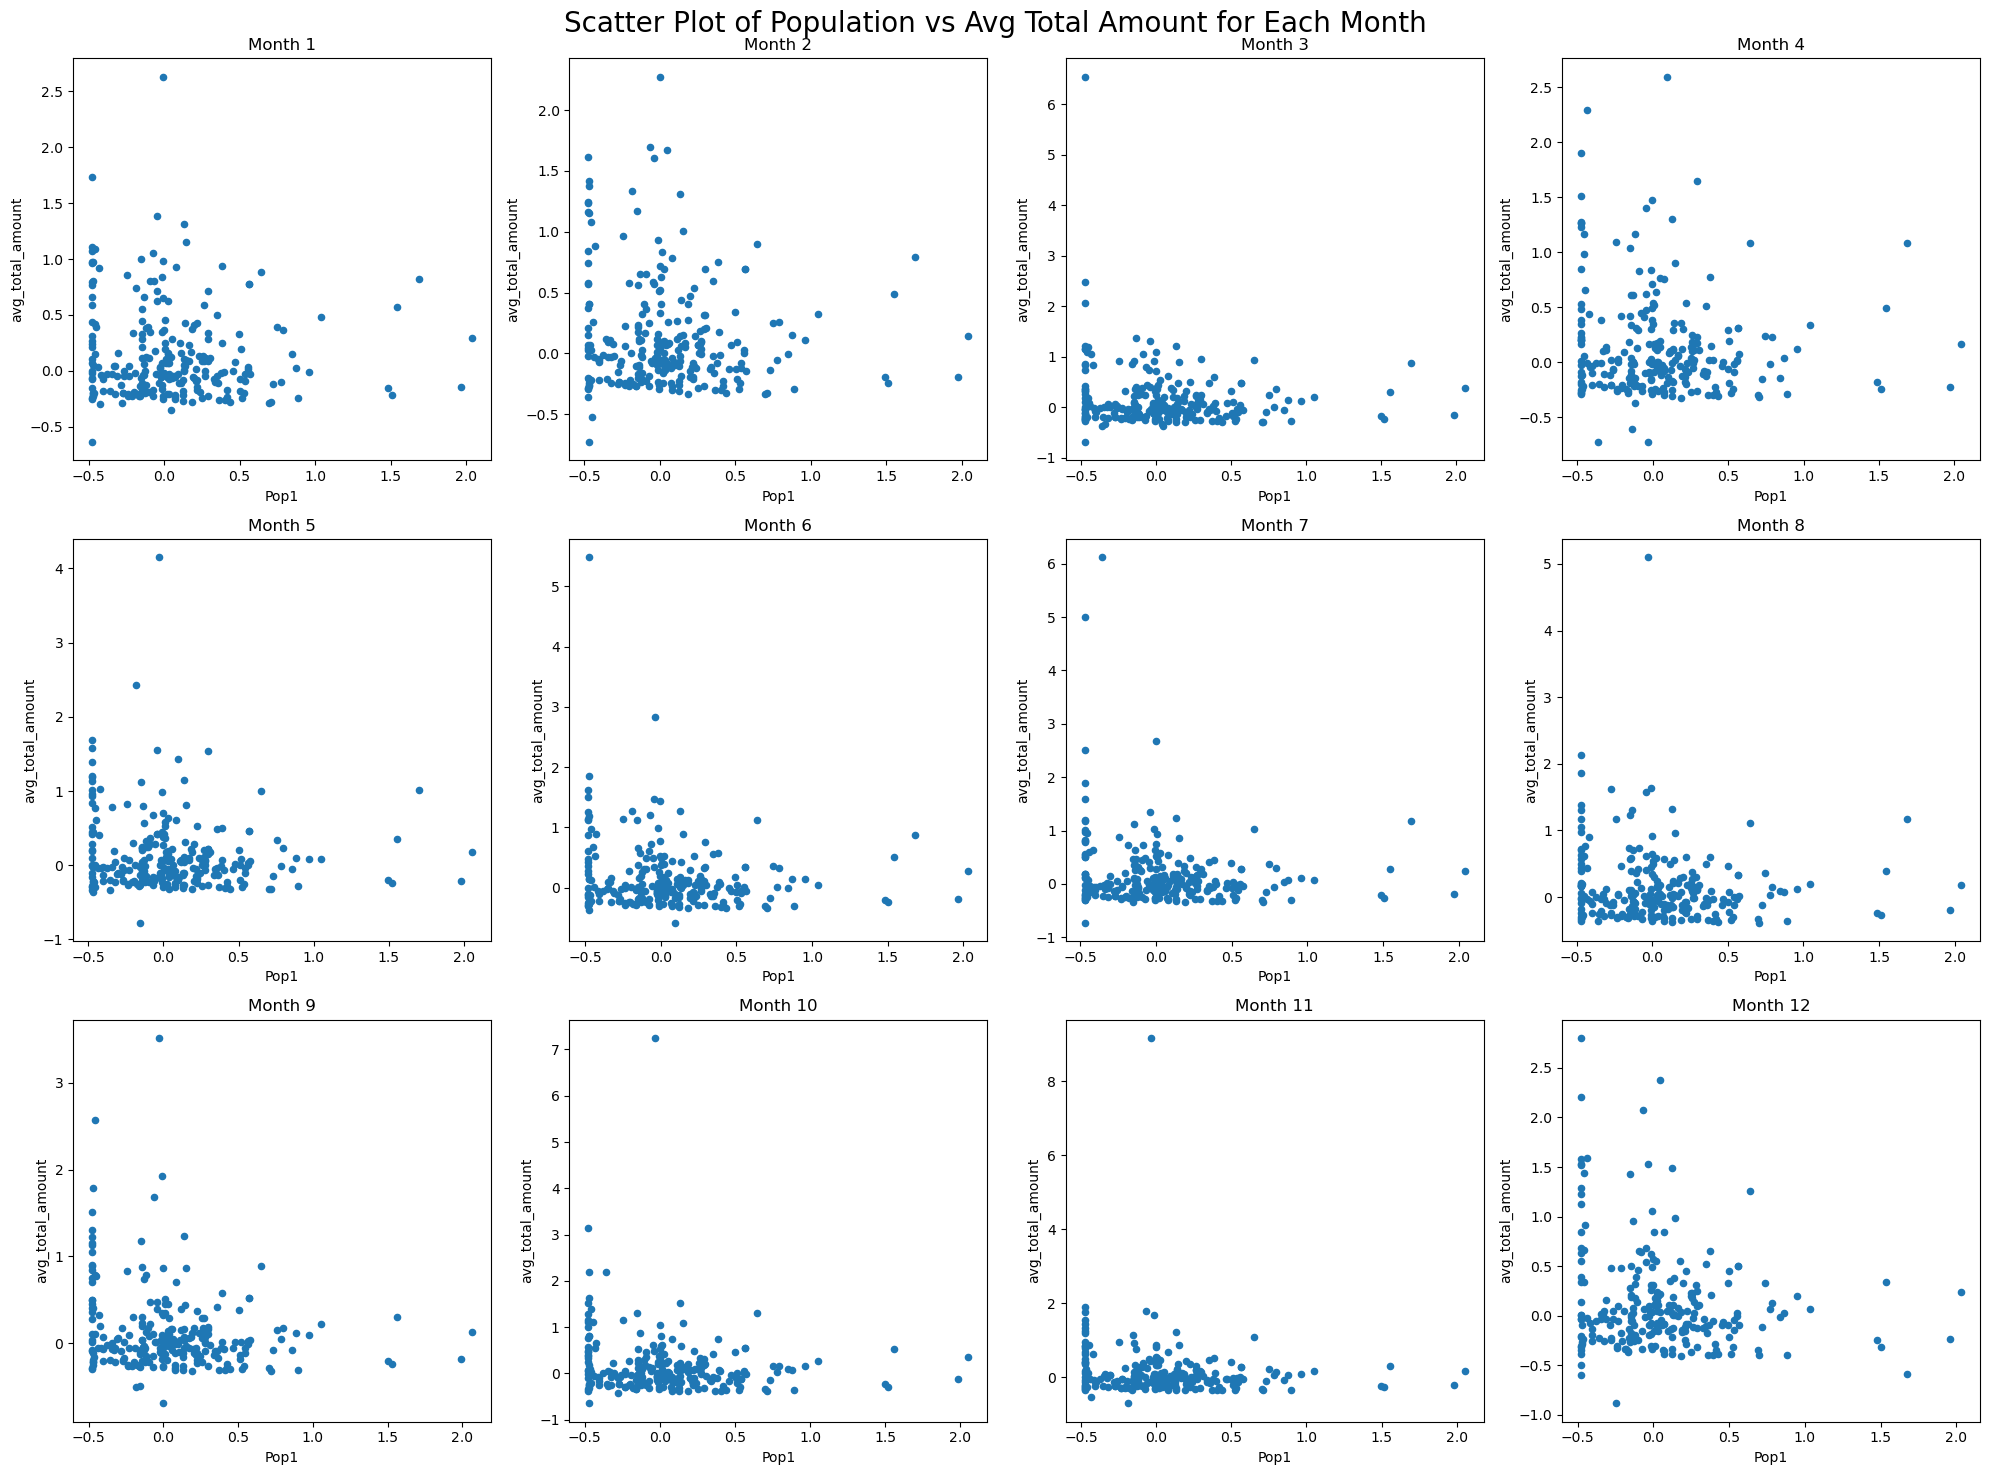

In [16]:
f, axes = plt.subplots(3, 4, figsize=(20, 15)) 
axes = axes.flatten()
for month in range(1, 13):
    normed_month = globals()[f'normed_{month}']
    ax = axes[month-1]
    normed_month.plot.scatter(x='Pop1', y='avg_total_amount', ax=ax)
    ax.set_title(f'Month {month}')

f.suptitle('Scatter Plot of Population vs Avg Total Amount for Each Month', size=20)
plt.tight_layout()
plt.show()

<br><br>

<a id="ID_meth"></a>
| [1. Introduction](#ID_intr) | [2. Literature Review](#ID_lt) | [3. Research Question](#ID_rq) | [4. Presentation of Data](#ID_pre) | [5. Methodology](#ID_meth) | [6. Results and Discussion](#ID_resu) | [7. Conclusion](#ID_con) |

## 5. Methodology

### 5.1 Data Processing

This study uses a comprehensive dataset of taxi trip records from New York City, provided by the NYC Taxi and Limousine Commission. The dataset includes essential variables such as trip distance. Data cleaning procedures were applied to remove anomalies and incomplete records, ensuring the robustness of the subsequent analysis.

Then we merge the taxi trip data with census data and population data for further analysis.

### 5.2 Clustering Analysis

To identify key geographical regions within the city, we employed two clustering techniques:

**5.2.1 DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Chosen for its ability to form clusters based on dense regions of data points, this algorithm is ideal for identifying high-density traffic areas without pre-specifying the number of clusters. The parameters adjusted include the minimum number of points required to form a cluster (MinPts) and the maximum distance between two points to be considered in the same neighborhood (epsilon).

**5.2.2 K-Means Clustering:** This method partitions the dataset into k clusters where each point belongs to the cluster with the nearest mean. The optimal number of clusters was determined by the Elbow Method, which involves plotting the explained variance against the number of clusters and selecting the elbow point.

### 5.3 Tree-based Methods

**5.3.1 Machine Learning Regression**

**Decision Tree Regressor:** Employed to model the nonlinear relationships between the predictors and the taxi revenue, providing a clear visualisation of the decision paths important for revenue prediction.

**5.3.2 CART Model:** The Classification and Regression Tree (CART) model was applied to explore the non-linear relationships between the variables and revenue outcomes. This model helped in understanding complex interaction effects and provided a hierarchical structure of decision-making factors influencing taxi revenues.


<br><br>

<a id="ID_resu"></a>
| [1. Introduction](#ID_intr) | [2. Literature Review](#ID_lt) | [3. Research Question](#ID_rq) | [4. Presentation of Data](#ID_pre) | [5. Methodology](#ID_meth) | [6. Results and Discussion](#ID_resu) | [7. Conclusion](#ID_con) |

## 6. Results and Discussion

### 6.1 Mapping Functions

In [17]:
def mapping_clusters(ppd, labels_cluster):
    ppd['cluster_nm'] = labels_cluster
    ppd.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

In [18]:
# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

Below are the functions modified to contain all 12 subplots for each month.

In [19]:
def mapping_clusters_sub(ppd, labels_cluster, ax):
    ppd['cluster_nm'] = labels_cluster
    ppd.plot(column='cluster_nm', categorical=True, legend=True, ax=ax, cmap='Paired')

In [20]:
def radar_plot_cluster_centroids_sub(df_cluster_centroid, ax):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        ax.plot(label_loc, centroid, label=f"Cluster {index}")
        ax.fill(label_loc, centroid, alpha=0.1)
    ax.set_title('Cluster centroid comparison', size=20, y=1.05)
    ax.set_thetagrids(np.degrees(label_loc), labels=categories)
    ax.legend()

### 6.2 DBSCAN Analysis

These are the DBSCAN results for each month:

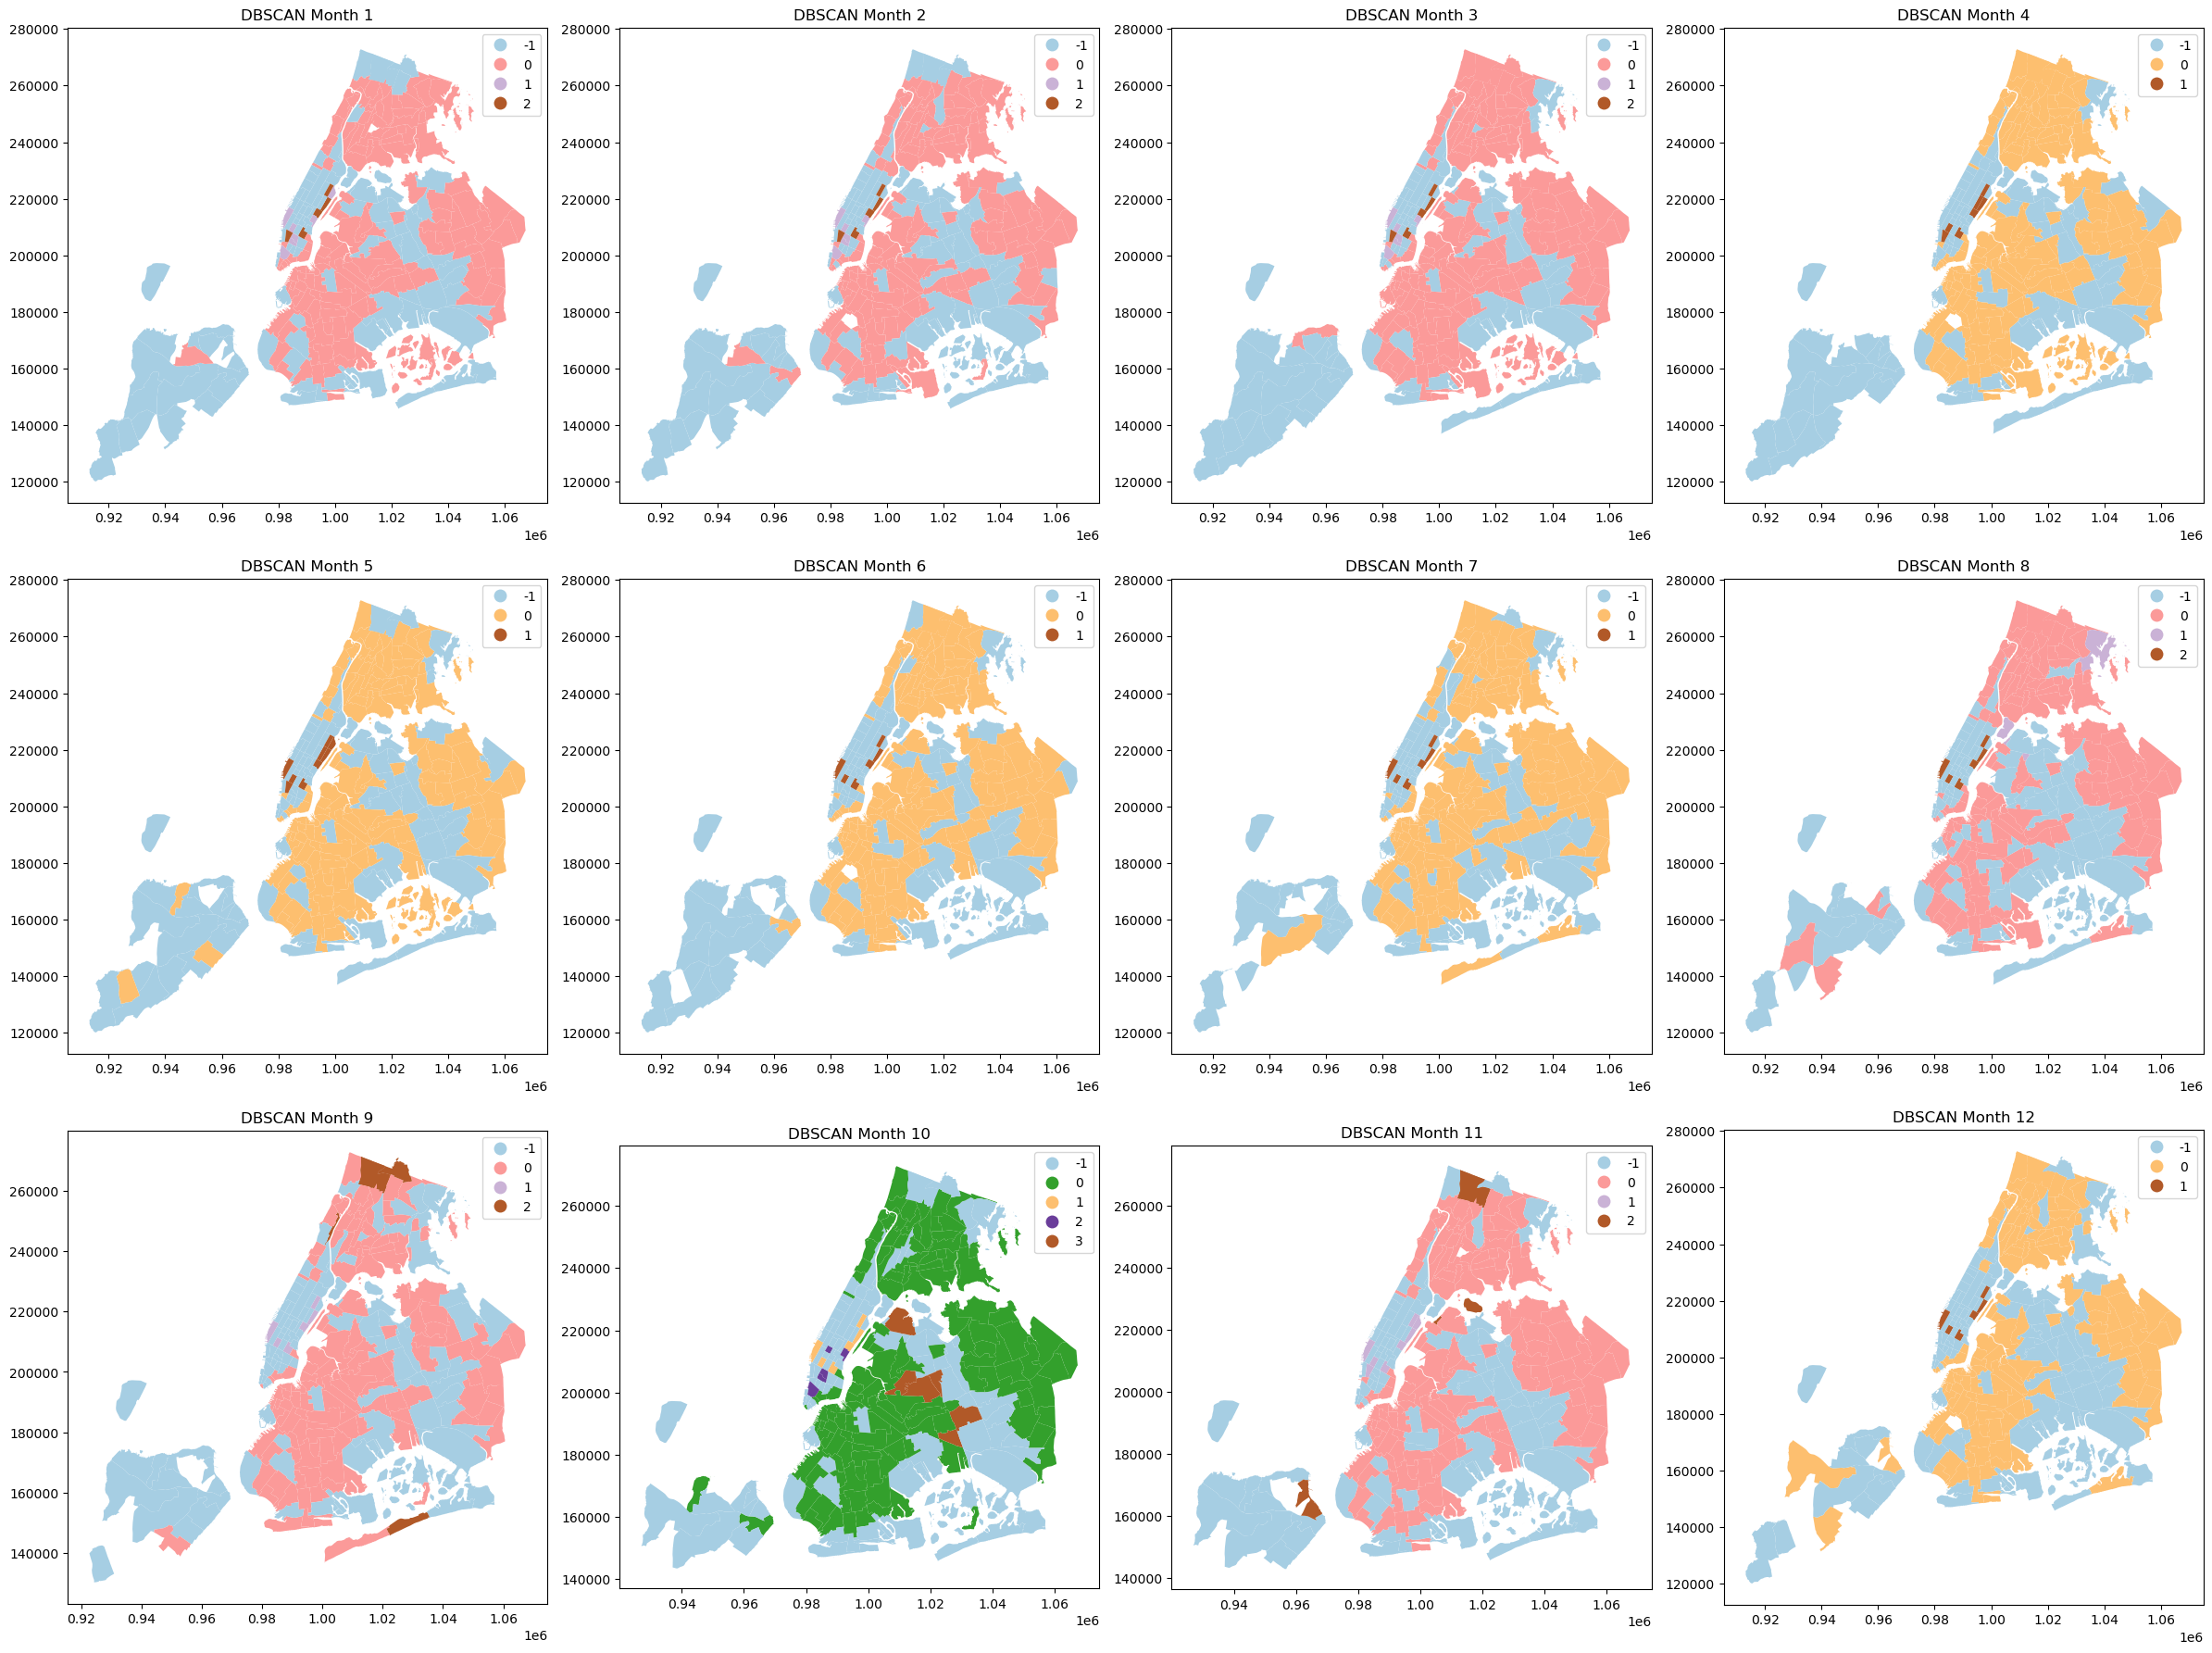

In [21]:
minPts = 5
epsilon = 0.2

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 18))  # 3行4列的子图
axes = axes.flatten()

for month in range(1, 13):    
    ppd_month = globals()[f'ppd_{month}']
    normed_month = globals()[f'normed_{month}']
    dbsc_month = DBSCAN(eps=epsilon, min_samples=minPts)
    dbsc_month.fit(normed_month)
    cluster_nm_month = dbsc_month.labels_
    
    mapping_clusters_sub(ppd_month, cluster_nm_month, axes[month-1])
    axes[month-1].set_title(f'DBSCAN Month {month}')

plt.tight_layout()
plt.show()

Based on the results, we can gain the following information:

**Temporal Variation:** There are noticeable changes in clustering patterns over different months, indicating variability in taxi trip distributions throughout the year. This could be influenced by seasonal factors, events, or changes in urban dynamics.

**Noise Points:** Noisy samples are given the label -1. These are data points that do not fit well into any cluster. Notably, there is a consistent presence of noise, but its distribution varies each month, suggesting areas of sporadic taxi activity.

**Cluster Stability and Change:** Some regions maintain consistent clustering across months, indicating stable taxi trip patterns in those areas. Conversely, changes in clustering from month to month might reflect shifting urban mobility behaviours or external impacts such as road construction or seasonal tourism.

**Month-Specific Patterns:** Certain months show a higher number of clusters (e.g., October), perhaps due to particular events or seasonal changes that affect travel behaviour. Conversely, other months show more homogeneous clustering (e.g., May), which could indicate less variation in travel patterns during that period.

We can summarise the number of taxi zones in each cluster:

In [22]:
for month in range(1, 13):    
    ppd_month = globals()[f'ppd_{month}']
    normed_month = globals()[f'normed_{month}']
    dbsc_month = DBSCAN(eps=epsilon, min_samples=minPts)
    dbsc_month.fit(normed_month)
    print(f'Month {month}')
    print(pd.Series(dbsc_month.labels_).value_counts())


Month 1
 0    142
-1     98
 1      7
 2      5
Name: count, dtype: int64
Month 2
 0    139
-1    103
 1      6
 2      5
Name: count, dtype: int64
Month 3
 0    155
-1     92
 1      6
 2      5
Name: count, dtype: int64
Month 4
 0    149
-1     98
 1      7
Name: count, dtype: int64
Month 5
 0    145
-1    103
 1      9
Name: count, dtype: int64
Month 6
 0    147
-1     98
 1      6
Name: count, dtype: int64
Month 7
 0    145
-1     99
 1      6
Name: count, dtype: int64
Month 8
 0    139
-1    103
 2      6
 1      4
Name: count, dtype: int64
Month 9
 0    133
-1    108
 1      6
 2      5
Name: count, dtype: int64
Month 10
 0    134
-1     96
 1      6
 3      6
 2      5
Name: count, dtype: int64
Month 11
 0    135
-1     99
 1      8
 2      5
Name: count, dtype: int64
Month 12
 0    133
-1    110
 1      6
Name: count, dtype: int64


We can also visualise the cluster centroid using the radar plot.

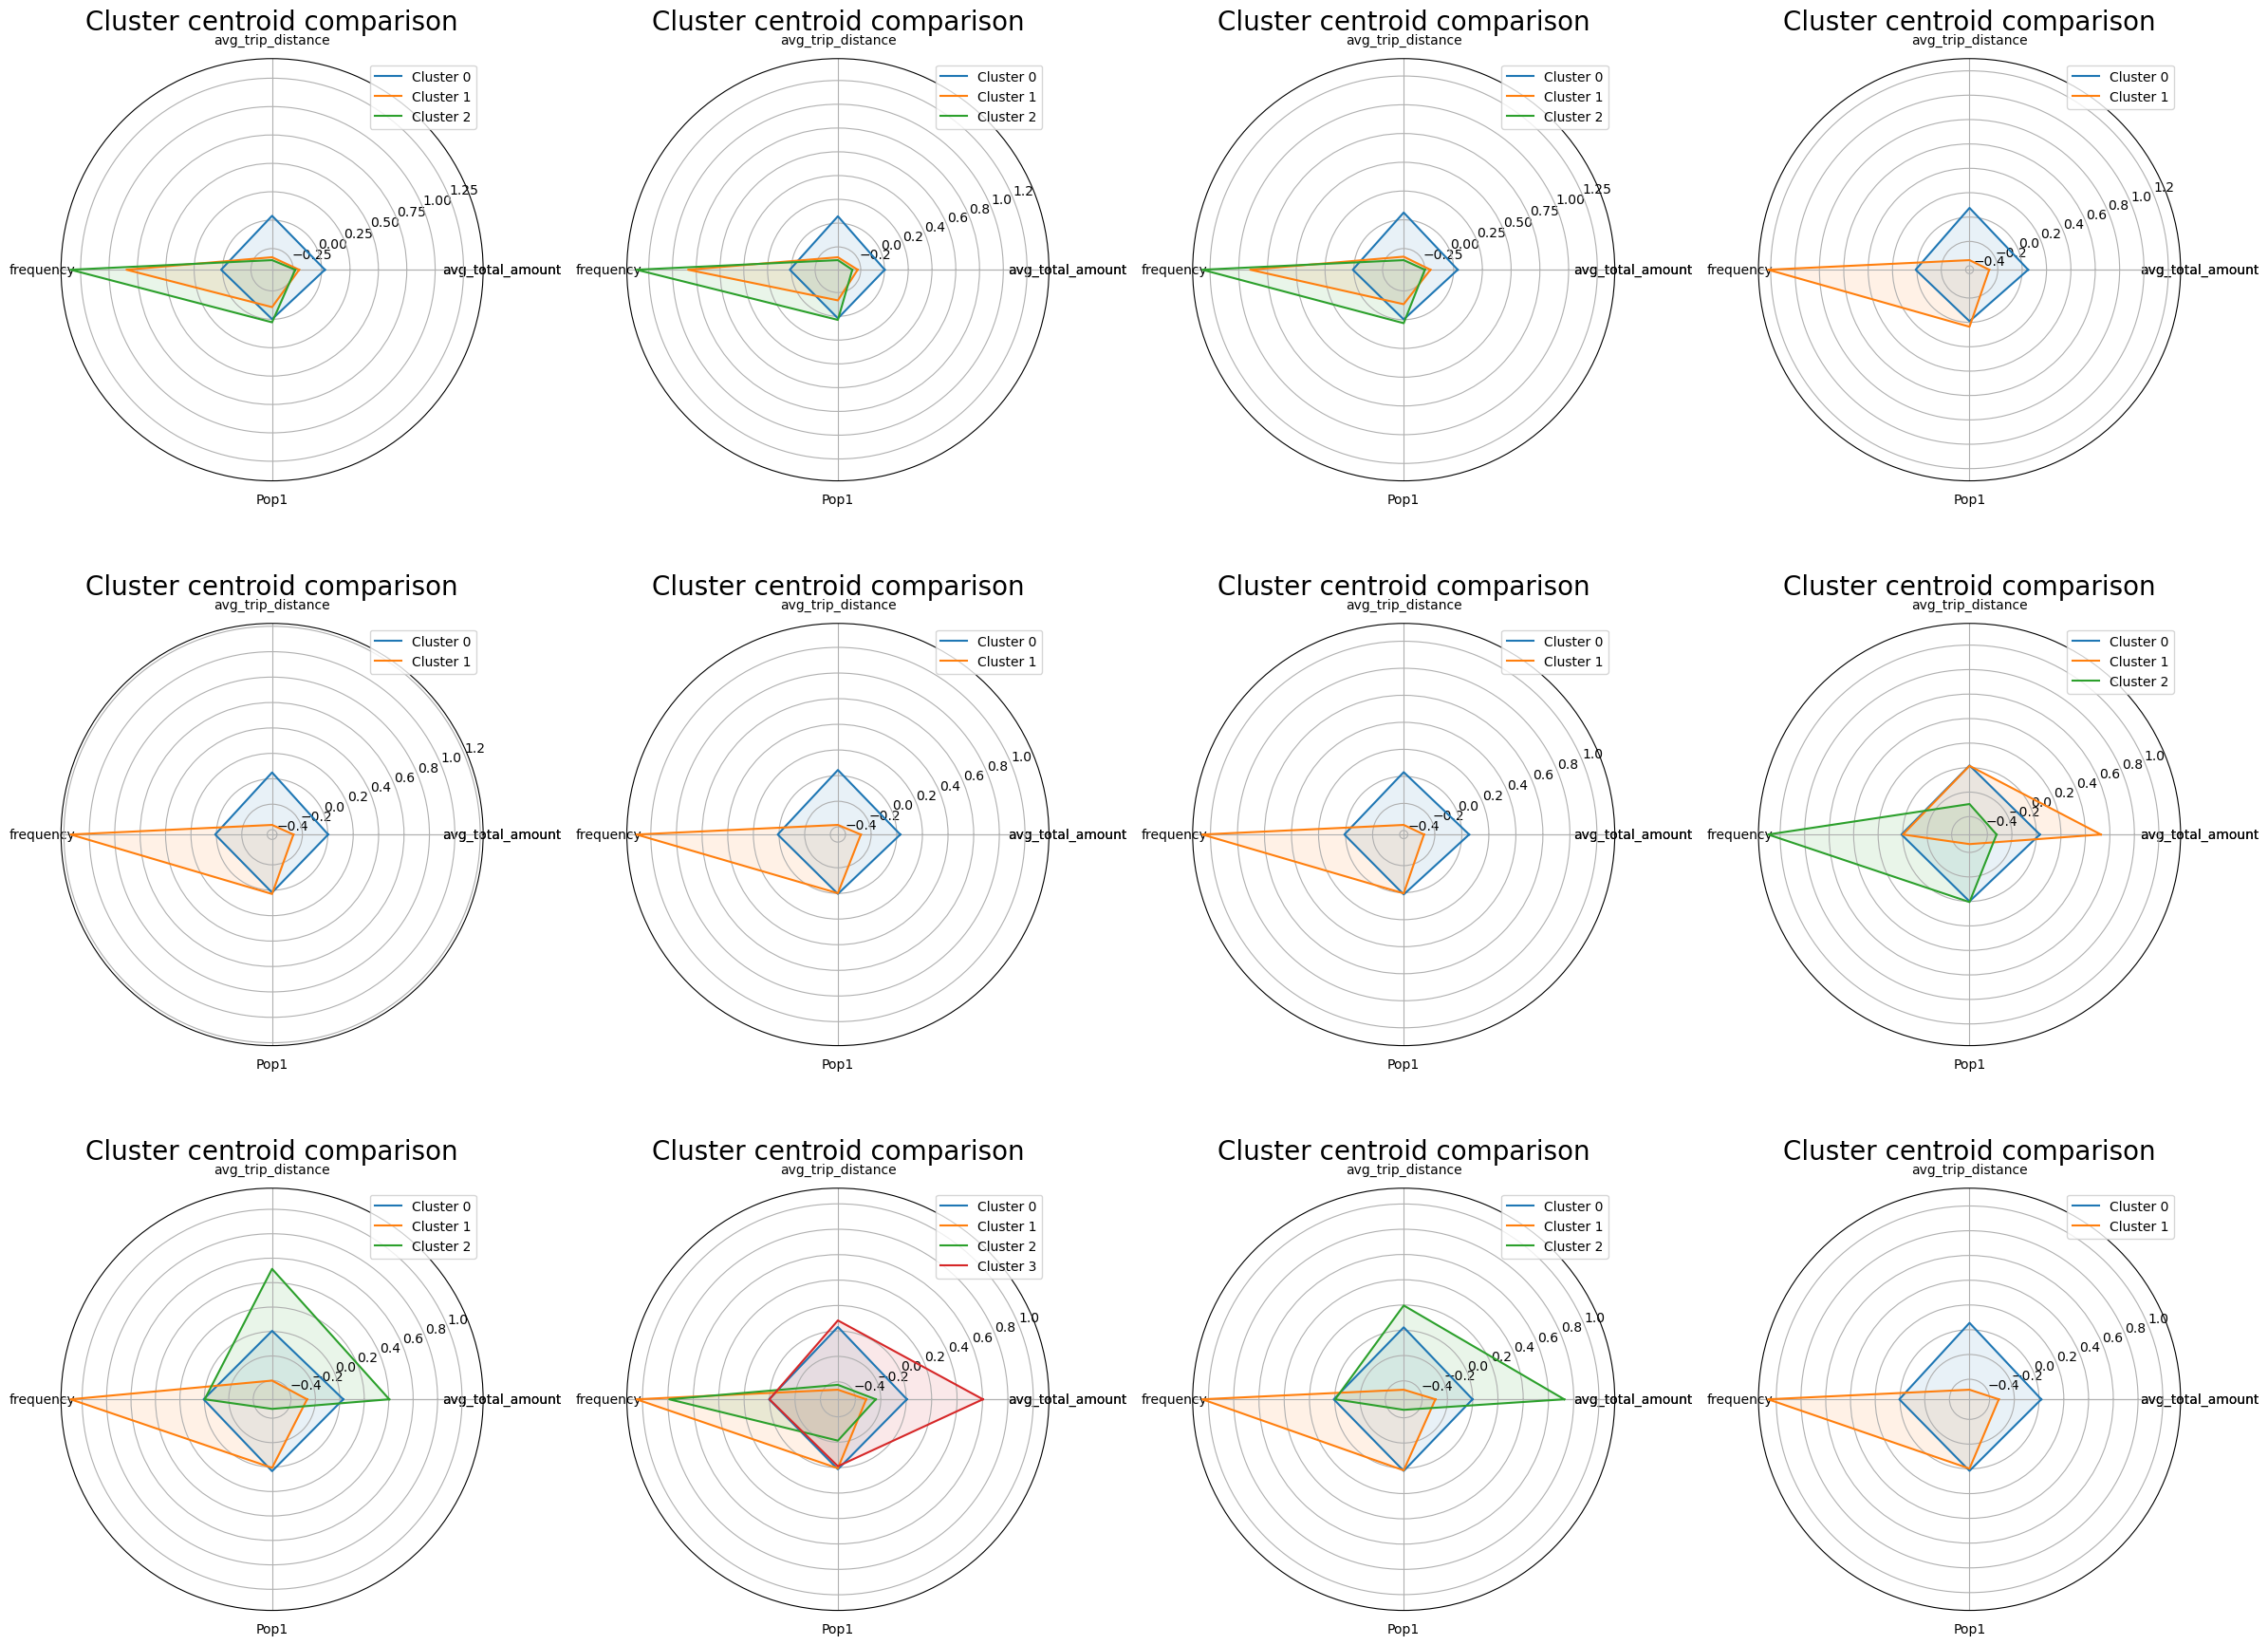

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 18), subplot_kw={'polar': True})
axes = axes.flatten()

for month in range(1, 13):    
    ppd_month = globals()[f'ppd_{month}']
    normed_month = globals()[f'normed_{month}']
    dbsc_month = DBSCAN(eps=epsilon, min_samples=minPts)
    dbsc_month.fit(normed_month)
    df_dbscan_month = normed_month.copy()
    df_dbscan_month['cluster'] = dbsc_month.labels_
    df_dbscan_centroid_month = df_dbscan_month.groupby('cluster').mean()
    df_dbscan_centroid_month.drop(-1, inplace=True)
    ax = axes[month-1]
    radar_plot_cluster_centroids_sub(df_dbscan_centroid_month, ax)

plt.tight_layout()
plt.show()

From the radar plots, we can summarise that:

**Cluster Variation:** There’s a noticeable variation among different clusters, suggesting that each cluster captures distinct patterns of taxi trip characteristics.

**Temporal Dynamics:** The shape and size of the clusters change over different months, which implies that the centroids of these clusters shift over time.

**Dominant Clusters:** Certain clusters seem to dominate specific variables. For instance, some clusters may consistently show higher average trip distances or total amounts, indicating regions with longer and pricier trips.

**Outliers and Common Trends:** The cluster(s) depicted in the radar charts that spread out farthest from the center may represent outlier behavior or significant trends, such as an area with unusually long trips (tourist destinations, airports, etc.) or higher revenues (business districts).

### 6.3 Kmeans Analysis

First, we will draw the SSE plots for each month. We will try the Elbow method to choose the k_cluster value. The idea is to choose a small number of clusters so that adding another cluster doesn't give much better modeling of the data.

From the plot, the "elbow" is the point at which the SSE starts to decrease at a slower rate as the number of clusters increases

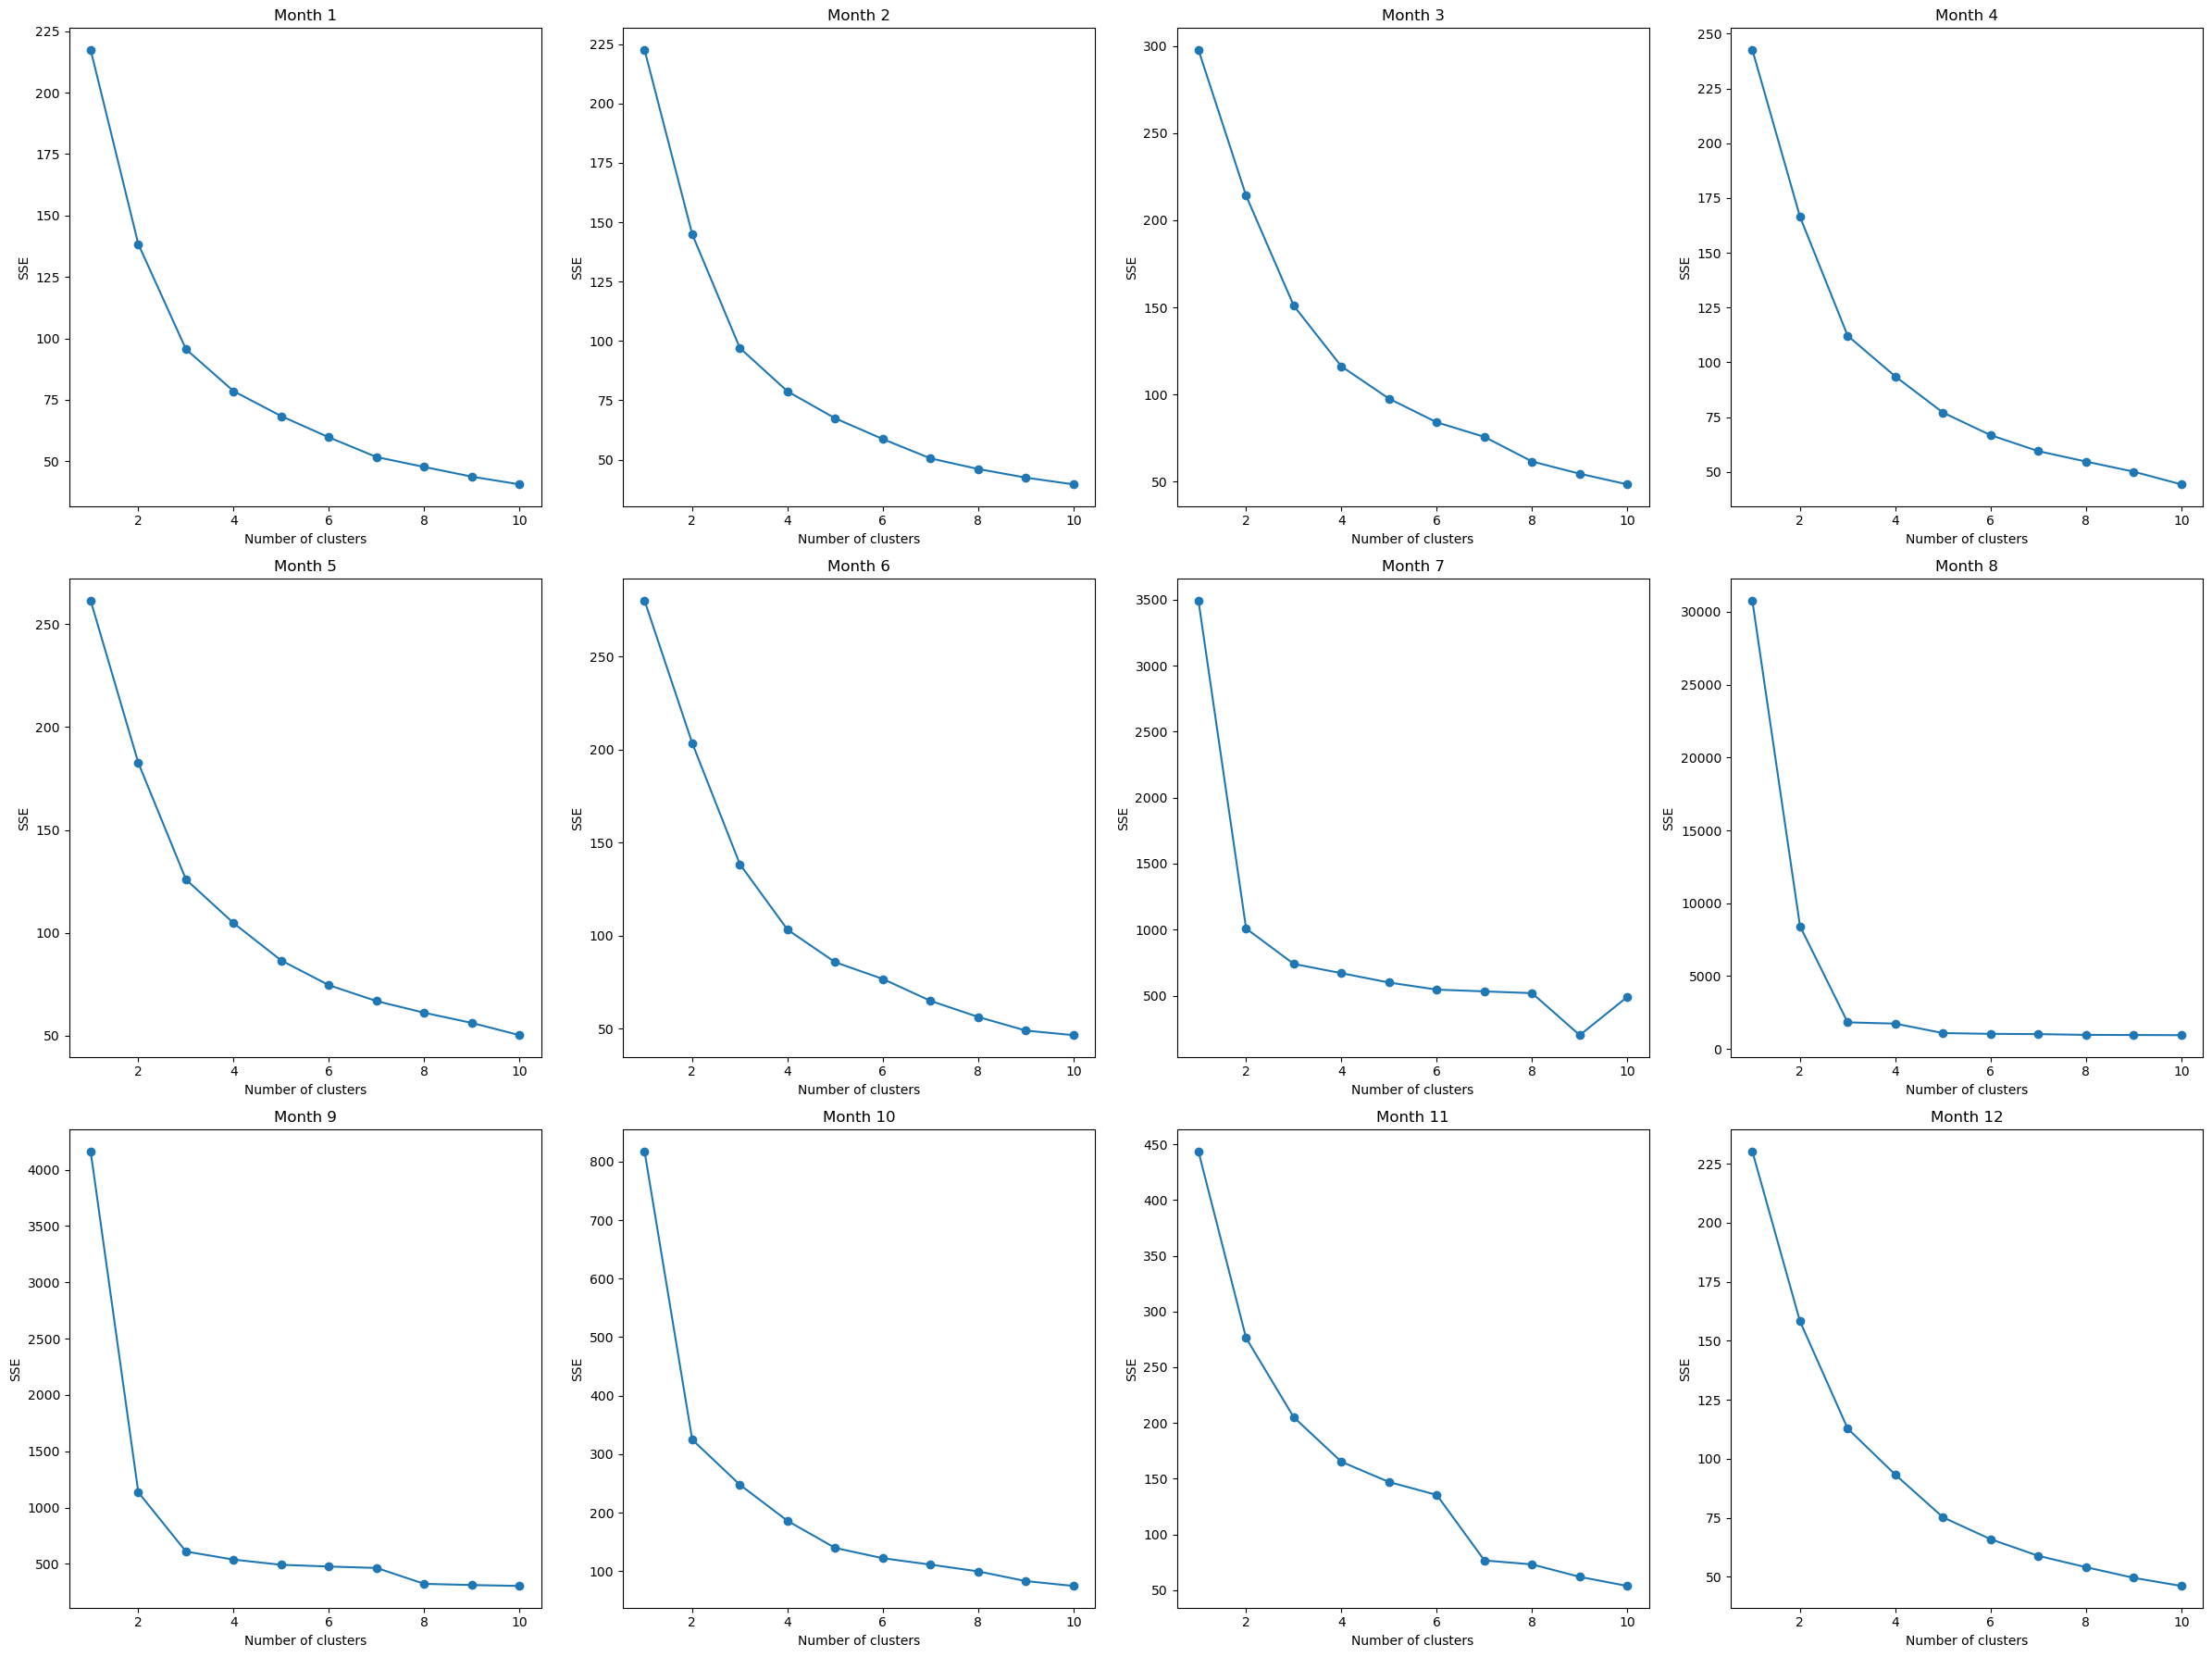

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 18))
axes = axes.flatten()

min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)

for month in range(1, 13):
    list_SSE = []
    normed_month = globals()[f'normed_{month}']
    for i in range_k:
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(normed_month)
        list_SSE.append(km.inertia_)
    
    # Plotting SSE on the corresponding subplots
    ax = axes[month-1]
    ax.plot(range_k, list_SSE, marker='o')
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('SSE')

plt.tight_layout()
plt.show()

From the plots, we decide the k_cluster value as follows:

In [25]:
k_cluster_1 = 3
k_cluster_2 = 3
k_cluster_3 = 3
k_cluster_4 = 2
k_cluster_5 = 3
k_cluster_6 = 3
k_cluster_7 = 2
k_cluster_8 = 3
k_cluster_9 = 3
k_cluster_10 = 4
k_cluster_11 = 4
k_cluster_12 = 3

Using different k values, we draw the Kmeans clustering map for each month:

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

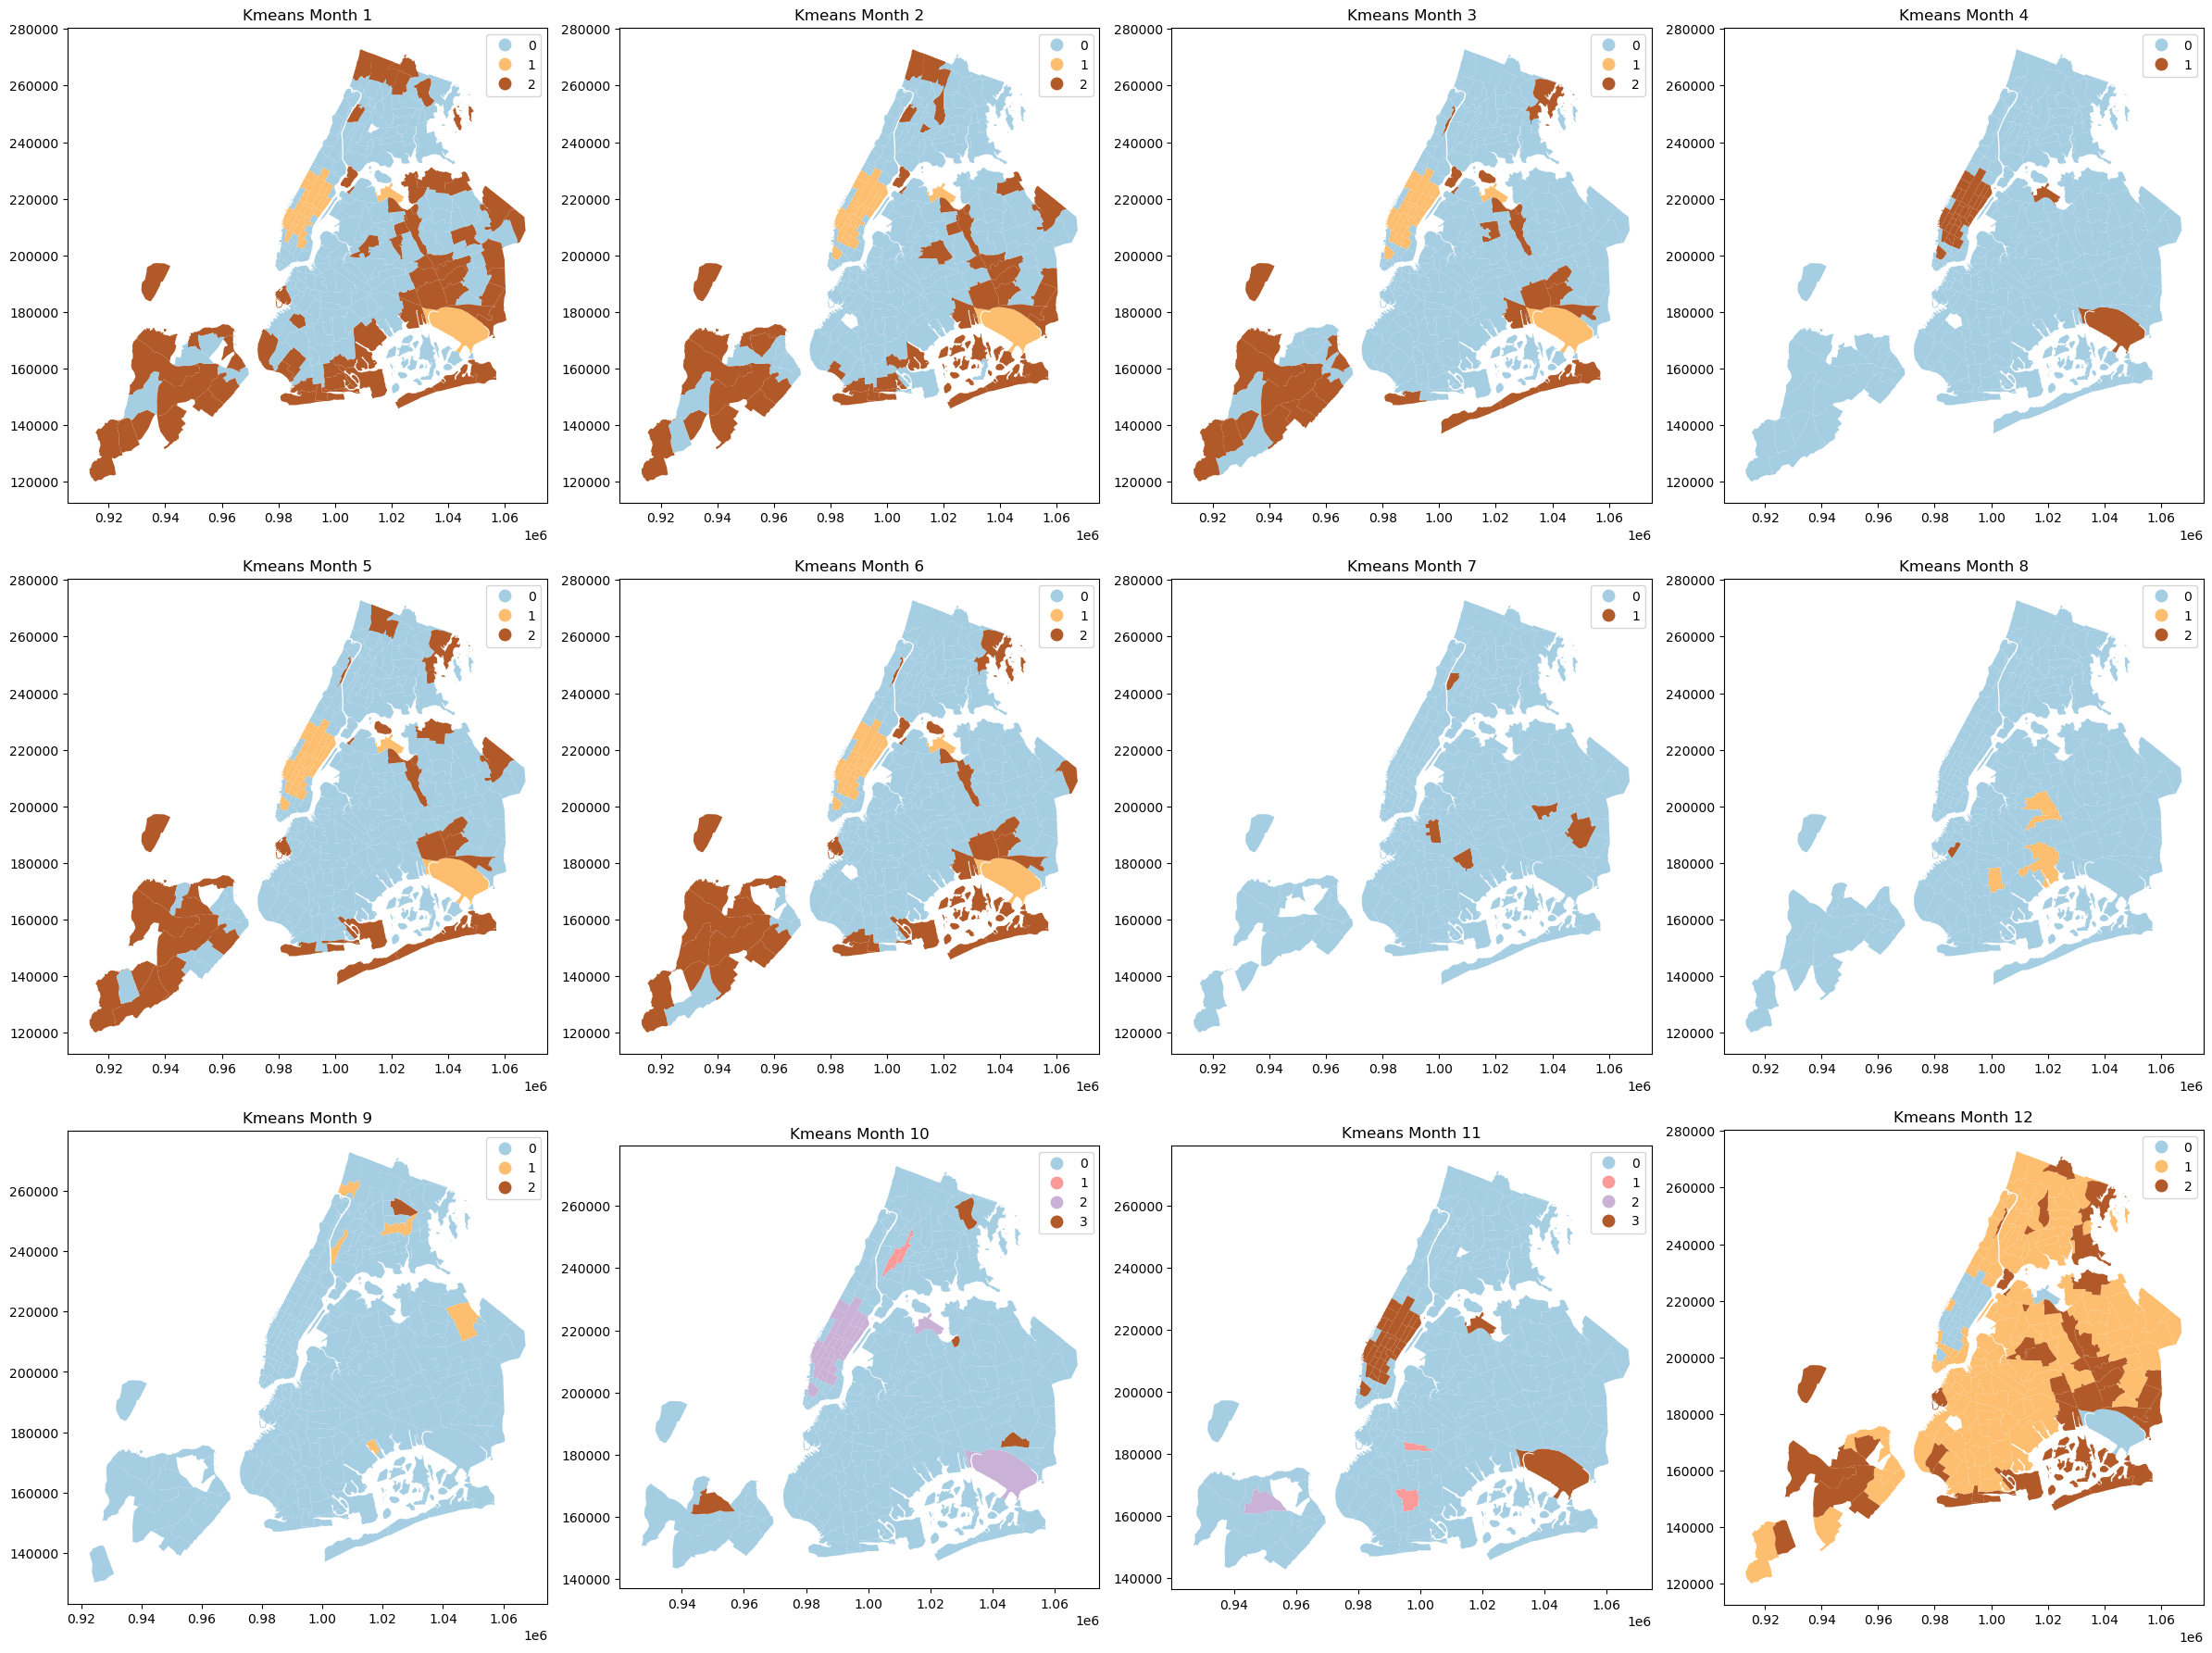

In [26]:
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
axes = axes.flatten()

random_seed = 123

for month in range(1, 13):
    ppd_month = globals()[f'ppd_{month}']
    k_cluster_month = globals()[f'k_cluster_{month}']
    normed_month = globals()[f'normed_{month}']
    kmeans_method_month = KMeans(n_clusters=k_cluster_month, random_state=random_seed)
    kmeans_method_month.fit(normed_month)
    ax = axes[month - 1]
    ax.set_title(f'Kmeans Month {month}')
    mapping_clusters_sub(ppd_month, kmeans_method_month.labels_, ax)

plt.tight_layout()
plt.show()

**Dominant Clusters:** Some clusters appear more extensive or more widespread than others, implying that there are dominant travel patterns or more common trip characteristics in those regions.

**Cluster Evolution Over Time:** By tracking the presence and change in clusters across months, one can observe trends and shifts in urban mobility. For example, the clustering in December is significantly different from other months, which might be due to the holiday season when travel patterns change.

**Potential Anomalies or Data Issues:** Some clusters seem to be isolated or fragmented (particularly in October), which could indicate anomalies in data, special events that alter traffic patterns, or the presence of geographic features like rivers or parks that naturally divide the clusters.

We can summarise the number of taxi zones in each cluster:

In [27]:
for month in range(1, 13):    
    ppd_month = globals()[f'ppd_{month}']
    normed_month = globals()[f'normed_{month}']
    k_cluster_month = globals()[f'k_cluster_{month}']
    kmeans_method_month = KMeans(n_clusters=k_cluster_month, random_state=random_seed)
    kmeans_method_month.fit(normed_month)
    print(f'Month {month}')
    print(pd.Series(kmeans_method_month.labels_).value_counts())


Month 1
0    158
2     66
1     28
Name: count, dtype: int64
Month 2
0    172
2     49
1     32
Name: count, dtype: int64
Month 3
0    194
1     33
2     31
Name: count, dtype: int64
Month 4
0    220
1     34
Name: count, dtype: int64
Month 5
0    189
2     35
1     33
Name: count, dtype: int64
Month 6
0    183
2     35
1     33
Name: count, dtype: int64
Month 7
0    245
1      5
Name: count, dtype: int64
Month 8
0    247
1      4
2      1
Name: count, dtype: int64
Month 9
0    246
1      5
2      1
Name: count, dtype: int64
Month 10
0    208
2     33
3      4
1      2
Name: count, dtype: int64
Month 11
0    210
3     34
1      2
2      1
Name: count, dtype: int64
Month 12
1    168
2     47
0     34
Name: count, dtype: int64


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

We can also visualise the cluster centroid using the radar plot.

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

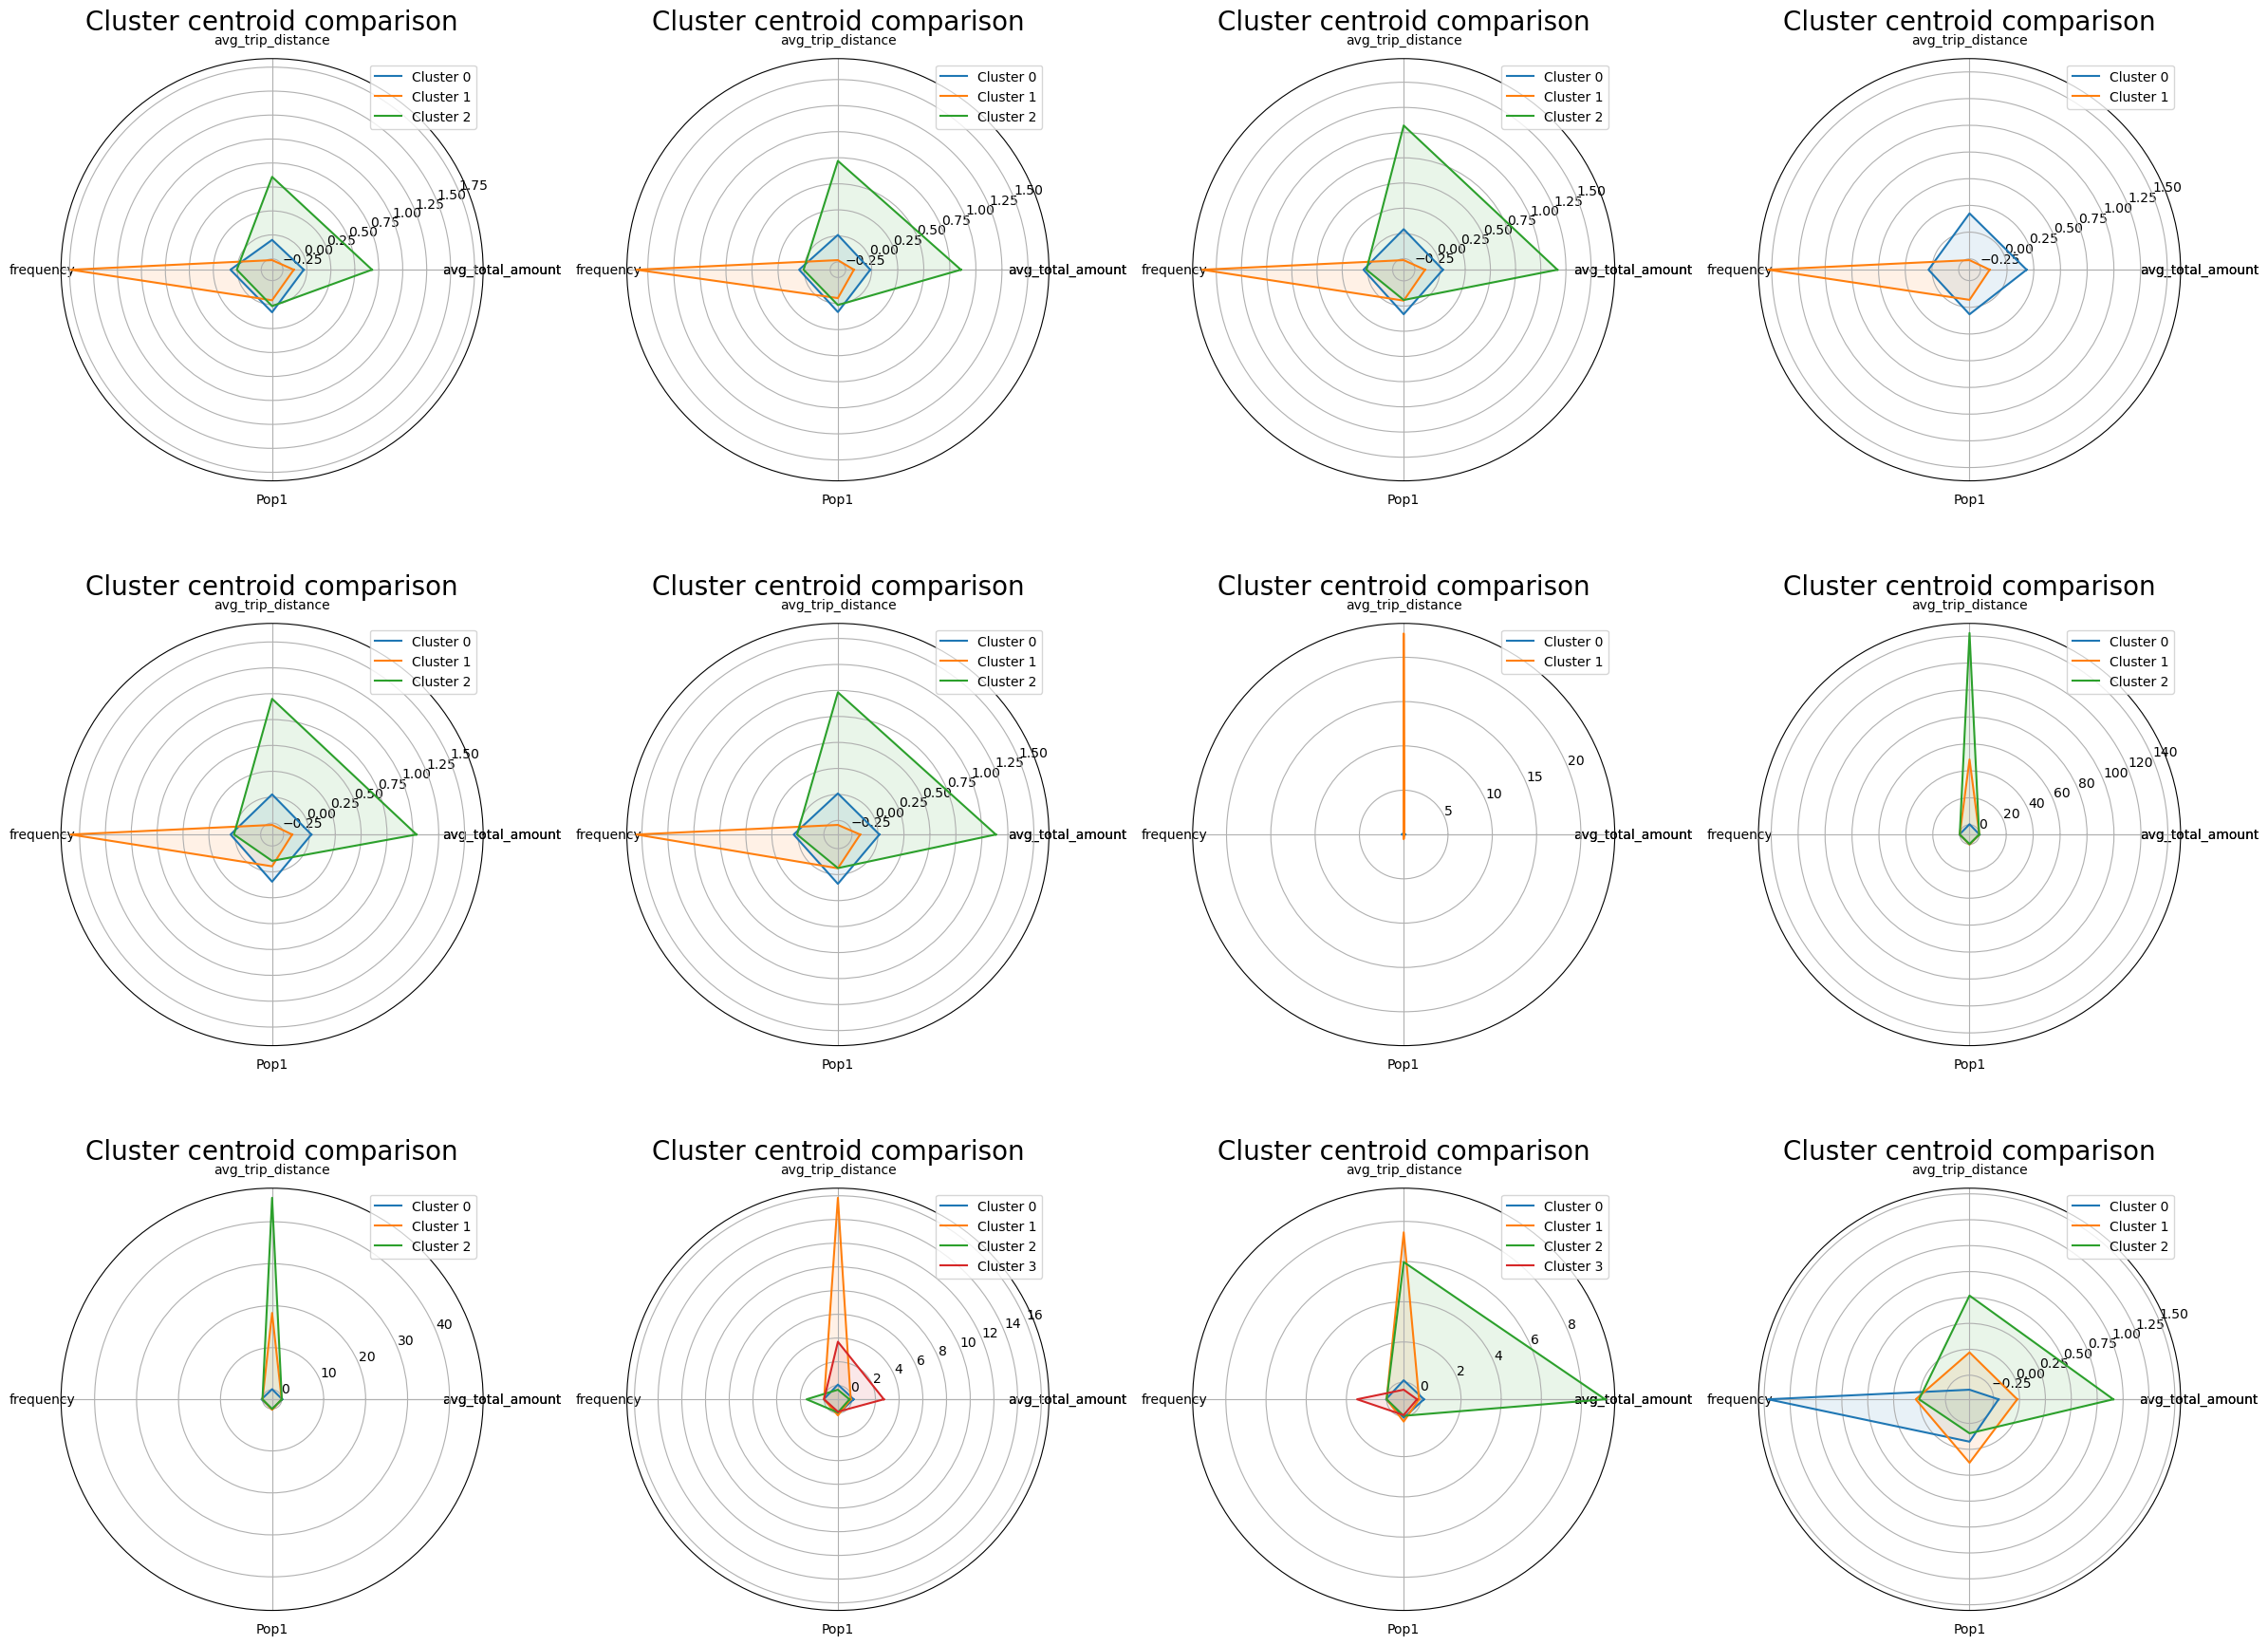

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 18), subplot_kw={'polar': True})
axes = axes.flatten()

for month in range(1, 13):    
    ppd_month = globals()[f'ppd_{month}']
    normed_month = globals()[f'normed_{month}']
    k_cluster_month = globals()[f'k_cluster_{month}']
    kmeans_method_month = KMeans(n_clusters=k_cluster_month, random_state=random_seed)
    kmeans_method_month.fit(normed_month)
    df_cluster_centroid_month = pd.DataFrame(kmeans_method_month.cluster_centers_, columns = normed_month.columns)
    ax = axes[month-1]
    radar_plot_cluster_centroids_sub(df_cluster_centroid_month, ax)

plt.tight_layout()
plt.show()

**Temporal Variations:** Changes in the centroids over the months may reflect temporal variations.

**Outliers and Data Anomalies:** Any significant deviation in a single cluster's centroid across the charts could indicate an outlier or anomaly such as in July.

### 6.4 Comparing DBSCAN and K-means

The most striking difference is how DBSCAN treats outliers as noise, while KMeans forces every point into a cluster, leading to a cleaner look in KMeans results, but potentially less accurate representation of the actual spatial distribution.

In terms of cluster shapes, DBSCAN allows for irregular shapes, adapting to the data density, whereas KMeans tends to form more circular (or spherical in higher dimensions) clusters.

Consistency of clusters is more in KMeans over the months, while DBSCAN's results are more variable.


### 6.5 Identify key regions

In this research, we decided to use the taxi trip data in four months: March, June, September and December as the city pattern in four seasons. From comparing the clustering results, since we need to choose one key region for all 4 months, we decided to choose the taxi trips whose pickup point is at the JFK Airport.

### 6.6 Tree-based methods

We use the data in March as an example to demonstrate.

We will calculate the duration time and the amount per minute to represent the revenue.

In [29]:
yellow_3JFK = yellow_3[yellow_3['PULocationID'] == 132]

In [30]:
yellow_3JFK.reset_index(drop=True, inplace=True)

In [31]:
yellow_3JFK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163623 entries, 0 to 163622
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               163623 non-null  int32         
 1   tpep_pickup_datetime   163623 non-null  datetime64[us]
 2   tpep_dropoff_datetime  163623 non-null  datetime64[us]
 3   passenger_count        163623 non-null  float64       
 4   trip_distance          163623 non-null  float64       
 5   RatecodeID             163623 non-null  float64       
 6   store_and_fwd_flag     163623 non-null  object        
 7   PULocationID           163623 non-null  int32         
 8   DOLocationID           163623 non-null  int32         
 9   payment_type           163623 non-null  int64         
 10  fare_amount            163623 non-null  float64       
 11  extra                  163623 non-null  float64       
 12  mta_tax                163623 non-null  floa

In [32]:
yellow_3JFK['duration_time'] = yellow_3JFK['tpep_dropoff_datetime'] - yellow_3JFK['tpep_pickup_datetime']

/tmp/ipykernel_2257/3296997514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_3JFK['duration_time'] = yellow_3JFK['tpep_dropoff_datetime'] - yellow_3JFK['tpep_pickup_datetime']


In [33]:
yellow_3JFK['duration_minutes'] = yellow_3JFK['duration_time'].dt.total_seconds() / 60.0

/tmp/ipykernel_2257/503633008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_3JFK['duration_minutes'] = yellow_3JFK['duration_time'].dt.total_seconds() / 60.0


In [34]:
yellow_3JFK['amount_per_min'] = yellow_3JFK['total_amount'] / yellow_3JFK['duration_minutes']

/tmp/ipykernel_2257/3560384251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_3JFK['amount_per_min'] = yellow_3JFK['total_amount'] / yellow_3JFK['duration_minutes']


In [35]:
# Handling infinite values in 'amount_per_min'
yellow_3JFK = yellow_3JFK.replace([float('inf'), -float('inf')], None)

In [36]:
# Dropping rows with NaN values resulted from the replacement
yellow_3JFK.dropna(subset=['amount_per_min'], inplace=True)

In [37]:
# Create new features based on datetime
yellow_3JFK['pickup_hour'] = yellow_3JFK['tpep_pickup_datetime'].dt.hour
yellow_3JFK['day_of_week'] = yellow_3JFK['tpep_pickup_datetime'].dt.dayofweek  # Monday is 0 and Sunday is 6

In [38]:
yellow_3JFK

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-03-01 00:29:18   2023-03-01 01:06:01              2.0   
1              1  2023-03-01 00:50:37   2023-03-01 01:04:46              1.0   
2              2  2023-03-01 00:14:55   2023-03-01 00:50:55              1.0   
3              2  2023-03-01 00:30:58   2023-03-01 01:03:39              1.0   
4              1  2023-03-01 00:54:35   2023-03-01 01:26:09              1.0   
...          ...                  ...                   ...              ...   
163618         2  2023-03-31 23:10:59   2023-04-01 00:08:09              1.0   
163619         1  2023-03-31 23:41:44   2023-04-01 00:35:24              1.0   
163620         2  2023-03-31 23:34:14   2023-04-01 00:19:43              2.0   
163621         1  2023-03-31 23:26:16   2023-04-01 00:21:26              1.0   
163622         2  2023-03-31 23:36:01   2023-04-01 00:18:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               21.03         2.0                  N           132   
1                6.40         1.0                  N           132   
2               19.68         2.0                  N           132   
3               19.35         2.0                  N           132   
4               21.30         2.0                  N           132   
...               ...         ...                ...           ...   
163618          19.67         2.0                  N           132   
163619          16.80         2.0                  N           132   
163620          18.36         2.0                  N           132   
163621          21.20         2.0                  N           132   
163622          17.27         2.0                  N           132   

        DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
0                239             1  ...          6.55                    1.0   
1                258             1  ...          0.00                    1.0   
2                158             1  ...          6.55                    1.0   
3                152             1  ...          6.55                    1.0   
4                 87             1  ...          0.00                    1.0   
...              ...           ...  ...           ...                    ...   
163618            68             1  ...          6.55                    1.0   
163619           230             1  ...          6.55                    1.0   
163620           230             2  ...          6.55                    1.0   
163621           140             1  ...          6.55                    1.0   
163622            68             2  ...          6.55                    1.0   

        total_amount  congestion_surcharge  Airport_fee   duration_time  \
0              93.80                   2.5         1.25 0 days 00:36:43   
1              36.65                   0.0         1.25 0 days 00:14:09   
2              98.16                   2.5         1.25 0 days 00:36:00   
3              91.20                   0.0         1.25 0 days 00:32:41   
4              90.30                   2.5         1.25 0 days 00:31:34   
...              ...                   ...          ...             ...   
163618         81.81                   2.5         1.25 0 days 00:57:10   
163619         91.80                   2.5         1.25 0 days 00:53:40   
163620         81.80                   2.5         1.25 0 days 00:45:29   
163621         91.80                   2.5         1.25 0 days 00:55:10   
163622         81.80                   2.5         1.25 0 days 00:42:21   

        duration_minutes  amount_per_min  pickup_hour day_of_week  
0              36.716667        2.554698            0           2  
1              14.150000        2.590106            0           2  
2              36.000000        2.726667            0           2  
3              32.683333        2.790413            0           2  
4   

In [39]:
# Selecting features and target variable
features = ['passenger_count', 'trip_distance', 'fare_amount', 'pickup_hour', 'day_of_week', 'tip_amount']
target = 'amount_per_min'

In [40]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(yellow_3JFK[features], yellow_3JFK[target], test_size=0.2, random_state=42)

In [41]:
print(X_train.index.identical(y_train.index))
print(X_test.index.identical(y_test.index))

True
True


#### Building a CART

In [42]:
# a CART using default settings
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(X_train, y_train)
# print the tree depth
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 57


In [43]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 10}
The best score is: 
0.5261923381577148


#### Training the final CART

In [44]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=10000)

In [45]:
print("R2 on the training data:")
print(dt_final.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(dt_final.score(X=X_test, y=y_test))

R2 on the training data:
0.823616850475293
R2 on the testing data:
0.5205101491516675


It looks like the R2 on the testing data is much lower than that on the training data. This indicates the overfitting problem, meaning that the model fits very well to the training data but doesn't generalise well to unseen data.

In [46]:
print("RMSE on the training data:")
print(mean_squared_error(y_train, dt_final.predict(X_train), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(y_test, dt_final.predict(X_test), squared=False))

RMSE on the training data:
27.814421804009186
RMSE on the testing data:
41.11412124214337


In [47]:
print("Normalised RMSE on the training data:")
print(mean_squared_error(y_train, dt_final.predict(X_train), squared=False)/np.mean(y_train))
print("Normalised RMSE on the testing data:")
print(mean_squared_error(y_test, dt_final.predict(X_test), squared=False)/np.mean(y_test))

Normalised RMSE on the training data:
5.189100633324052
Normalised RMSE on the testing data:
7.733853258646672


In [48]:
# some attributes of the tree
print("Tree depth:{}".format(dt_final.get_depth()))
print("Number of leaves:{}".format(dt_final.get_n_leaves()))

Tree depth:10
Number of leaves:249


#### Interpreting the CART

In [49]:
# the importances function returns a dataframe of two columns, Feature and Importance, and the features are ranked from the most important to the least.
imp = rfpimp.importances(dt_final, X_test, y_test)
print(imp)

                 Importance
Feature                    
trip_distance      5.889558
fare_amount        0.507271
pickup_hour        0.133886
passenger_count    0.096750
day_of_week        0.000344
tip_amount        -0.149125


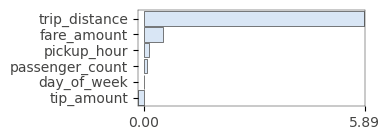

In [50]:
## Here is a barplot of the feature importance
viz = rfpimp.plot_importances(imp)
viz.view()

The feature importance above shows that the most important features are **fare_amount**, **trip_distance**

Higher fare amounts and longer distances travelled usually mean more revenue per minute, possibly because these journeys cover motorway journeys or long distances, which usually incur higher charges.

The impact of ridership is small, probably because most trip costs are not directly dependent on ridership.

Pick-up times and days of the week have a very limited impact on revenue per minute, and more detailed segmentation of time periods or additional analysis of special days (e.g., holidays) may be needed to uncover more nuanced patterns.

#### Data for other months

In [51]:
yellow_6JFK = yellow_6[yellow_6['PULocationID'] == 132]
yellow_6JFK.reset_index(drop=True, inplace=True)
yellow_6JFK['duration_time'] = yellow_6JFK['tpep_dropoff_datetime'] - yellow_6JFK['tpep_pickup_datetime']
yellow_6JFK['duration_minutes'] = yellow_6JFK['duration_time'].dt.total_seconds() / 60.0
yellow_6JFK['amount_per_min'] = yellow_6JFK['total_amount'] / yellow_6JFK['duration_minutes']
yellow_6JFK = yellow_6JFK.replace([float('inf'), -float('inf')], None)
yellow_6JFK.dropna(subset=['amount_per_min'], inplace=True)
yellow_6JFK['pickup_hour'] = yellow_6JFK['tpep_pickup_datetime'].dt.hour
yellow_6JFK['day_of_week'] = yellow_6JFK['tpep_pickup_datetime'].dt.dayofweek  # Monday is 0 and Sunday is 6

/tmp/ipykernel_2257/3458006214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_6JFK['duration_time'] = yellow_6JFK['tpep_dropoff_datetime'] - yellow_6JFK['tpep_pickup_datetime']
/tmp/ipykernel_2257/3458006214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_6JFK['duration_minutes'] = yellow_6JFK['duration_time'].dt.total_seconds() / 60.0
/tmp/ipykernel_2257/3458006214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [52]:
features = ['passenger_count', 'trip_distance', 'fare_amount', 'pickup_hour', 'day_of_week', 'tip_amount']
target = 'amount_per_min'

X_train, X_test, y_train, y_test = train_test_split(yellow_6JFK[features], yellow_6JFK[target], test_size=0.2, random_state=42)
print(X_train.index.identical(y_train.index))
print(X_test.index.identical(y_test.index))

True
True


In [53]:
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(X_train, y_train)
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 53


In [54]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 10}
The best score is: 
0.26563941871691465


In [55]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=10000)

In [56]:
print("R2 on the training data:")
print(dt_final.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(dt_final.score(X=X_test, y=y_test))

R2 on the training data:
0.7680970838125294
R2 on the testing data:
0.357191716704931


In [57]:
print("RMSE on the training data:")
print(mean_squared_error(y_train, dt_final.predict(X_train), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(y_test, dt_final.predict(X_test), squared=False))

RMSE on the training data:
30.983220085184723
RMSE on the testing data:
57.55397863632218


In [58]:
print("Normalised RMSE on the training data:")
print(mean_squared_error(y_train, dt_final.predict(X_train), squared=False)/np.mean(y_train))
print("Normalised RMSE on the testing data:")
print(mean_squared_error(y_test, dt_final.predict(X_test), squared=False)/np.mean(y_test))

Normalised RMSE on the training data:
6.077026179160306
Normalised RMSE on the testing data:
11.10072402007758


In [59]:
# some attributes of the tree
print("Tree depth:{}".format(dt_final.get_depth()))
print("Number of leaves:{}".format(dt_final.get_n_leaves()))

Tree depth:10
Number of leaves:203


In [60]:
# the importances function returns a dataframe of two columns, Feature and Importance, and the features are ranked from the most important to the least.
imp = rfpimp.importances(dt_final, X_test, y_test)
print(imp)

                 Importance
Feature                    
trip_distance      2.161946
fare_amount        2.126356
pickup_hour        0.722731
tip_amount         0.119602
day_of_week        0.001917
passenger_count    0.000003


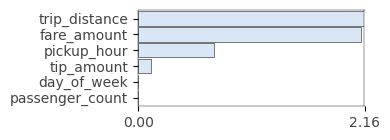

In [61]:
## Here is a barplot of the feature importance
viz = rfpimp.plot_importances(imp)
viz.view()

In [62]:
yellow_9JFK = yellow_9[yellow_9['PULocationID'] == 132]
yellow_9JFK.reset_index(drop=True, inplace=True)
yellow_9JFK['duration_time'] = yellow_9JFK['tpep_dropoff_datetime'] - yellow_9JFK['tpep_pickup_datetime']
yellow_9JFK['duration_minutes'] = yellow_9JFK['duration_time'].dt.total_seconds() / 60.0
yellow_9JFK['amount_per_min'] = yellow_9JFK['total_amount'] / yellow_9JFK['duration_minutes']
yellow_9JFK = yellow_9JFK.replace([float('inf'), -float('inf')], None)
yellow_9JFK.dropna(subset=['amount_per_min'], inplace=True)
yellow_9JFK['pickup_hour'] = yellow_9JFK['tpep_pickup_datetime'].dt.hour
yellow_9JFK['day_of_week'] = yellow_9JFK['tpep_pickup_datetime'].dt.dayofweek  # Monday is 0 and Sunday is 6

/tmp/ipykernel_2257/2777746760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_9JFK['duration_time'] = yellow_9JFK['tpep_dropoff_datetime'] - yellow_9JFK['tpep_pickup_datetime']
/tmp/ipykernel_2257/2777746760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_9JFK['duration_minutes'] = yellow_9JFK['duration_time'].dt.total_seconds() / 60.0
/tmp/ipykernel_2257/2777746760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [63]:
features = ['passenger_count', 'trip_distance', 'fare_amount', 'pickup_hour', 'day_of_week', 'tip_amount']
target = 'amount_per_min'

X_train, X_test, y_train, y_test = train_test_split(yellow_9JFK[features], yellow_9JFK[target], test_size=0.2, random_state=42)
print(X_train.index.identical(y_train.index))
print(X_test.index.identical(y_test.index))

True
True


In [64]:
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(X_train, y_train)
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 52


In [65]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 8}
The best score is: 
0.26460999578595024


In [66]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=8, random_state=10000)

In [67]:
print("R2 on the training data:")
print(dt_final.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(dt_final.score(X=X_test, y=y_test))

R2 on the training data:
0.8366767463321892
R2 on the testing data:
0.49959598746864164


In [68]:
print("RMSE on the training data:")
print(mean_squared_error(y_train, dt_final.predict(X_train), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(y_test, dt_final.predict(X_test), squared=False))

RMSE on the training data:
21.796340089129185
RMSE on the testing data:
37.30531924197992


In [69]:
print("Normalised RMSE on the training data:")
print(mean_squared_error(y_train, dt_final.predict(X_train), squared=False)/np.mean(y_train))
print("Normalised RMSE on the testing data:")
print(mean_squared_error(y_test, dt_final.predict(X_test), squared=False)/np.mean(y_test))

Normalised RMSE on the training data:
4.465089856221659
Normalised RMSE on the testing data:
7.866418922154215


In [70]:
# some attributes of the tree
print("Tree depth:{}".format(dt_final.get_depth()))
print("Number of leaves:{}".format(dt_final.get_n_leaves()))

Tree depth:10
Number of leaves:276


In [71]:
# the importances function returns a dataframe of two columns, Feature and Importance, and the features are ranked from the most important to the least.
imp = rfpimp.importances(dt_final, X_test, y_test)
print(imp)

                 Importance
Feature                    
trip_distance      2.291676
fare_amount        1.402847
tip_amount         0.375246
day_of_week        0.060609
passenger_count    0.000443
pickup_hour       -0.038238


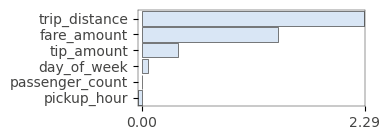

In [72]:
## Here is a barplot of the feature importance
viz = rfpimp.plot_importances(imp)
viz.view()

In [73]:
yellow_12JFK = yellow_12[yellow_12['PULocationID'] == 132]
yellow_12JFK.reset_index(drop=True, inplace=True)
yellow_12JFK['duration_time'] = yellow_12JFK['tpep_dropoff_datetime'] - yellow_12JFK['tpep_pickup_datetime']
yellow_12JFK['duration_minutes'] = yellow_12JFK['duration_time'].dt.total_seconds() / 60.0
yellow_12JFK['amount_per_min'] = yellow_12JFK['total_amount'] / yellow_12JFK['duration_minutes']
yellow_12JFK = yellow_12JFK.replace([float('inf'), -float('inf')], None)
yellow_12JFK.dropna(subset=['amount_per_min'], inplace=True)
yellow_12JFK['pickup_hour'] = yellow_12JFK['tpep_pickup_datetime'].dt.hour
yellow_12JFK['day_of_week'] = yellow_12JFK['tpep_pickup_datetime'].dt.dayofweek  # Monday is 0 and Sunday is 6

/tmp/ipykernel_2257/1065366831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_12JFK['duration_time'] = yellow_12JFK['tpep_dropoff_datetime'] - yellow_12JFK['tpep_pickup_datetime']
/tmp/ipykernel_2257/1065366831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_12JFK['duration_minutes'] = yellow_12JFK['duration_time'].dt.total_seconds() / 60.0
/tmp/ipykernel_2257/1065366831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [74]:
features = ['passenger_count', 'trip_distance', 'fare_amount', 'pickup_hour', 'day_of_week', 'tip_amount']
target = 'amount_per_min'

X_train, X_test, y_train, y_test = train_test_split(yellow_12JFK[features], yellow_12JFK[target], test_size=0.2, random_state=42)
print(X_train.index.identical(y_train.index))
print(X_test.index.identical(y_test.index))

True
True


In [75]:
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(X_train, y_train)
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 60


In [76]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 10}
The best score is: 
0.3784401438098667


In [77]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=10000)

In [78]:
print("R2 on the training data:")
print(dt_final.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(dt_final.score(X=X_test, y=y_test))

R2 on the training data:
0.786981102117307
R2 on the testing data:
0.6066839580287111


In [79]:
print("RMSE on the training data:")
print(mean_squared_error(y_train, dt_final.predict(X_train), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(y_test, dt_final.predict(X_test), squared=False))

RMSE on the training data:
38.05203165356995
RMSE on the testing data:
47.49911389469608


In [80]:
print("Normalised RMSE on the training data:")
print(mean_squared_error(y_train, dt_final.predict(X_train), squared=False)/np.mean(y_train))
print("Normalised RMSE on the testing data:")
print(mean_squared_error(y_test, dt_final.predict(X_test), squared=False)/np.mean(y_test))

Normalised RMSE on the training data:
5.2524837783646205
Normalised RMSE on the testing data:
6.673201867168506


In [81]:
# some attributes of the tree
print("Tree depth:{}".format(dt_final.get_depth()))
print("Number of leaves:{}".format(dt_final.get_n_leaves()))

Tree depth:10
Number of leaves:215


In [82]:
# the importances function returns a dataframe of two columns, Feature and Importance, and the features are ranked from the most important to the least.
imp = rfpimp.importances(dt_final, X_test, y_test)
print(imp)

                 Importance
Feature                    
trip_distance      2.724038
fare_amount        1.150005
pickup_hour        0.122542
day_of_week        0.063841
passenger_count    0.000027
tip_amount        -0.345077


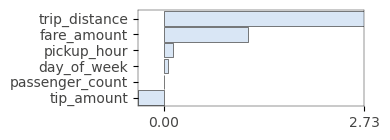

In [83]:
## Here is a barplot of the feature importance
viz = rfpimp.plot_importances(imp)
viz.view()

From the results of the 4 seasons, we can conclude that:

**Trip Distance** and **Fare Amount** are consistently the top two predictors across all months, implying a strong relationship between these features and the target variable.

The importance of **Pickup Hour**, **Day of Week**, and **Passenger Count** fluctuates across months, indicating that their influence on the target variable may be dependent on seasonal or other temporal factors.

**Tip Amount** varies in its importance and even becomes slightly negative in two months, which could mean that in certain contexts, larger tips are associated with lower values of the target variable, or they may have less predictive power compared to other features.

<br><br>

<a id="ID_con"></a>
| [1. Introduction](#ID_intr) | [2. Literature Review](#ID_lt) | [3. Research Question](#ID_rq) | [4. Presentation of Data](#ID_pre) | [5. Methodology](#ID_meth) | [6. Results and Discussion](#ID_resu) | [7. Conclusion](#ID_con) |

## 7. Conclusion

This report has employed both DBSCAN and K-means clustering to analyse New York City taxi trip data, revealing insightful patterns of urban transportation. DBSCAN effectively identified areas of varying taxi trip density and isolated outliers, offering a detailed portrayal of the city's transit dynamics. In contrast, K-means provided a broader overview of trip distribution, grouping data into more uniform clusters without the sensitivity of DBSCAN.

Seasonal and temporal variations were evident in the changing cluster formations from month to month, indicating the influence of external factors like weather, events, and urban flux on taxi trip patterns.

Complementing the spatial analysis, CART models quantified the impact of different predictors on taxi trip revenues. Across months, trip distance and fare amount appeared frequently as significant factors, reinforcing the value of distance-based and fare-based considerations in revenue optimisation. The variability in the importance of other predictors such as pickup hour and tip amount highlighted the complex nature of factors influencing taxi service revenues.

combining these findings, urban mobility is multifaceted, affected by a blend of spatial, temporal, and economic factors. For city planners and taxi service providers, the insights from this report can inform targeted, data-driven strategies to optimize operations and enhance the profitability of the taxi industry in urban settings.
ector.

<br><br>

***

## Bibliography

Hou, Y., Garikapati, V., Weigl, D., Henao, A., Moniot, M. and Sperling, J. (2020). ‘Factors Influencing Willingness to Pool in Ride-Hailing Trips’. Transportation Research Record. SAGE Publications Inc, 2674 (5), pp. 419–429. doi: 10.1177/0361198120915886.<br>

Kumar, D., Wu, H., Lu, Y., Krishnaswamy, S. and Palaniswami, M. (2016). ‘Understanding Urban Mobility via Taxi Trip Clustering’. in 2016 17th IEEE International Conference on Mobile Data Management (MDM). 2016 17th IEEE International Conference on Mobile Data Management (MDM), pp. 318–324. doi: 10.1109/MDM.2016.54.<br><br>

Liu, X., Gong, L., Gong, Y. and Liu, Y. (2015). ‘Revealing travel patterns and city structure with taxi trip data’. Journal of Transport Geography, 43, pp. 78–90. doi: 10.1016/j.jtrangeo.2015.01.016.<br><br>

Liu, Y., Kang, C., Gao, S., Xiao, Y. and Tian, Y. (2012). ‘Understanding intra-urban trip patterns from taxi trajectory data’. Journal of Geographical Systems, 14 (4), pp. 463–483. doi: 10.1007/s10109-012-0166-z.<br><br>

Nguyen-Phuoc, D. Q., Su, D. N., Tran, P. T. K., Le, D.-T. T. and Johnson, L. W. (2020). ‘Factors influencing customer’s loyalty towards ride-hailing taxi services – A case study of Vietnam’. Transportation Research Part A: Policy and Practice, 134, pp. 96–112. doi: 10.1016/j.tra.2020.02.008.<br><br>

Pahmi, S., Saepudin, S., Maesarah, N., Solehudin, U. I., and Wulandari. (2018). ‘Implementation of CART (Classification and Regression Trees) Algorithm for Determining Factors Affecting Employee Performance’. in 2018 International Conference on Computing, Engineering, and Design (ICCED). 2018 International Conference on Computing, Engineering, and Design (ICCED), pp. 57–62. doi: 10.1109/ICCED.2018.00021.<br><br>